In [4]:
from IPython.display import Image
from IPython.core.display import HTML 

In [75]:
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

In [46]:
Image(url= "https://grist.org/wp-content/uploads/2023/04/GettyImages-1475185891-1.jpg")

<a id='I. Introduction'></a>
<h1 style="color:#ffffff; background-color:#3A3A5B; border: 1px solid #ffffff; padding: 10px 10px 10px 10px; text-align: center;">Electrical Fault Prediction: Using Machine Learning to Predict Fault Classifications</h1>


<a id='I. Introduction'></a>
<h1 style="color:#ffffff; background-color:#3A3A5B; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;">I. Introduction</h1>

<p>
    Electrical systems form the backbone of modern infrastructure, yet they are vulnerable to a variety of faults that can disrupt their operation. The detection and classification of these faults are critical for the maintenance of power systems, as undetected faults can lead to significant downtime, equipment damage, and even pose safety hazards. With the increasing complexity of electrical networks, particularly in intelligent buildings and infrastructure, traditional manual fault detection methods are no longer sufficient. The demand for automated, accurate, and rapid fault diagnosis methods is therefore growing. </p>

<p> 
    The objective of this project is to develop a machine learning model that can accurately predict and classify different types of faults in electrical systems. By leveraging historical fault data and applying advanced algorithmic techniques, the model aims to enhance the fault diagnosis process, thus ensuring the reliable, safe, and stable operation of electrical systems. The use of machine learning in fault classification not only improves the speed and accuracy of the diagnosis but also reduces the subjectivity and uncertainty inherent in manual checks.</p>

<p>
    In the pursuit of this goal, the project will explore a variety of machine learning classifiers, including Decision Trees, Random Forest, XGBoost, LightGBM, and CatBoost, to determine which offers the best performance in terms of precision, recall, and F1 score—a critical metric that balances the trade-off between precision and recall. The project will also investigate the use of SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance within the training data, ensuring that the model performs well across all fault types.</p>

<p>
    Through extensive model training, validation, and testing, the project aims to deliver a robust solution that can be integrated into real-time monitoring systems, such as SCADA (Supervisory Control and Data Acquisition), to enable swift and accurate fault detection in electrical systems.</p>

<a id='Highlights'></a>
<h1 style="color:#ffffff; background-color:#3A3A5B; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;">Highlights</h1>

<ul>
    <li> CatBoost excelled as the top model with a perfect 100% F1 score.</li>
    <li> Top 10 features significantly enhanced predictive accuracy.</li>
    <li> A streamlined feature set reduced overfitting and boosted efficiency.</li>
    <li> Feature Engineering proved crucial for optimal performance.</li>
    <li> The project highlights the power of targeted model optimization.</li>
</ul>

<a id='Method and Results'></a>
<h1 style="color:#ffffff; background-color:#3A3A5B; border: 1px solid #ffffff; padding: 10px 10px 10px 10px;">Method and Results</h1>

In [77]:
Image(url= "https://i.ibb.co/hfRMjK9/Screenshot-2023-12-09-at-7-05-15-AM.png")

<h2> Methodology</h2> 

<ul>
    <li> Data Source: The project commenced with the collection of comprehensive electrical fault data, forming the foundation for subsequent analysis. Data source is from Kaggle. </li>
    <li> Data Cleaning and Preprocessing: This phase involved rigorously refining the data, ensuring its quality by rectifying inconsistencies, handling missing values, and standardizing formats. </li>
    <li> Exploratory Data Analysis (EDA): Here, an in-depth exploration of the dataset is conducted too uncover patterns, anomalies, and correlations, providing valuable insights that informed our feature engineering efforts. </li>
    <li> Feature Engineering: This critical step involved creating new features and selecting the most relevant ones. It played a pivotal role in enhancing the model's performance. </li>
    <li> Data Modeling: Various machine learning models, including advanced classifiers like CatBoost and XGBoost, were trained on the processed data. </li>
    <li> Model Evaluation: Each model's performance was meticulously evaluated using metrics such as F1 score, precision, and recall. </li>
</ul>

https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification/data

<h3> Importing Libraries </h3> 

In [2]:
# General utilities
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures, LabelEncoder
from collections import Counter

# Machine Learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve

# Handling imbalanced datasets
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Checking the dataset </h3>

In [7]:
df_classdata = pd.read_csv('classData.csv.xls')
df_classdata.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [8]:
df_classdata.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


<h4> The 'df_classdata' dataset comprises 10 features, including three line currents: 'Ia', 'Ib', and 'Ic', and three line voltages: 'Va', 'Vb', and 'Vc'. These six features serve as the input variables. The dataset also includes four output features, that represent various types of electrical faults. These faults are classified based on combinations of four line fault indicators: 'G', 'C', 'B', and 'A'. From these indicators, there are 16 distinct types of faults that can be derived from these four output categories. </h4>

<h5>Types of faults:</h5>
    
|<p></p> | <p></p> | <h4>Output</h4> | <p></p> | <p></p>
| :---: | :---: | :---: |:---:| :---: |
| <u>**Type of fault**</u> | <u>**A**</u> | <u>**B**</u> | <u>**C**</u> | <u>**G**</u> |
| No fault| 0 | 0| 0 | 0
| Fault in Line A | **1** | 0| 0 | 0
| Fault in Line B | 0 | **1** | 0 | 0 
| Fault in Line C | 0 | 0 | **1** | 0
| LG fault (Phase A and Ground) | **1** | 0 | 0 | **1**
| LG fault (Phase B and Ground) | 0 | **1** | 0 | **1**
| LG fault (Phase C and Ground) | 0 | 0 | **1** | **1**
| LL fault (Phase A and Phase B) | **1** | **1** | 0 | 0
| LL fault (Phase A and Phase C) | **1** | 0 | **1** | 0
| LL fault (Phase B and Phase C) | 0 | **1** | **1** | 0
| LLG Fault (Phases A, B and Ground) | **1** | **1** | 0 | **1**
| LLG Fault (Phases A, C and Ground) | **1** | 0 | **1** | **1**
| LLG Fault (Phases B, C and Ground) | 0 | **1** | **1** | **1**
| LLL Fault(All three phases) | **1** | **1** | **1** | 0
| LLLG fault (Three phase symmetrical fault) | **1** | **1** | **1** | **1**


In [9]:
df_detect = pd.read_csv('detect_dataset.csv.xls')
df_detect

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,NaN,NaN
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,NaN,NaN
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,NaN,NaN
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,NaN,NaN


In [10]:
df_detect.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


<h4> 
    The <b>'df_detect'</b> dataset comprises 7 features, including three line currents: 'Ia', 'Ib', and 'Ic', and three line voltages: 'Va', 'Vb', and 'Vc', similar with the <b>'df_classdata'</b> dataset. These six features serve as input variables. The distinguishing feature of this dataset is its singular output, <b>'Output (S)'</b>, which identifies whether a fault is present or not. There are also 2 irrelevant columns which is intended to be dropped in the later part of this analysis.
</h4>

<h4> We plan to apply the classification model developed with the <b>'df_classdata'</b> dataset to <b>'df_detect'</b> to infer potential fault types. However, it is important to note that the <h4>'df_detect'</b> dataset only allows us to verify the presence or absence of faults, not their specific types. </h4>

<h3> Data Cleaning and Preprocessing </h3>

In [11]:
df_classdata.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [12]:
# To improve ease of use, ill re-order the faults
df_classdata = df_classdata.reindex(
    columns=['A', 'B', 'C', 'G', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
df_classdata.head()

,A,B,C,G,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [13]:
# Check for missing values
df_classdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       7861 non-null   int64  
 1   B       7861 non-null   int64  
 2   C       7861 non-null   int64  
 3   G       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [14]:
df_classdata.isnull().sum()

A     0
B     0
C     0
G     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [15]:
df_detect.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [16]:
df_detect.drop(columns = ['Unnamed: 7', 'Unnamed: 8'], inplace=True)
df_detect

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [17]:
df_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [18]:
df_detect.isnull().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

<h3> Exploratory Data Analysis </h3>

In [19]:
df_classdata

,A,B,C,G,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [20]:
gfaultcount = df_classdata['G'].value_counts()
cfaultcount = df_classdata['C'].value_counts()
bfaultcount = df_classdata['B'].value_counts()
afaultcount = df_classdata['A'].value_counts()

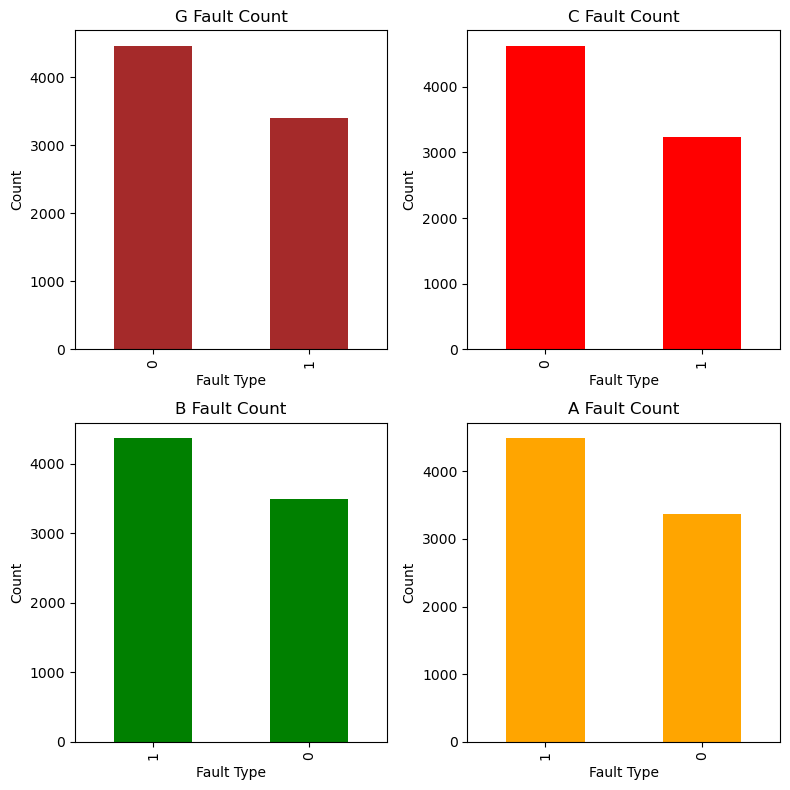

In [21]:
#Plotting all fault types
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

gfaultcount.plot(kind='bar', ax=axs[0, 0],
                 color='brown', title='G Fault Count')
cfaultcount.plot(kind='bar', ax=axs[0, 1],
                 color='red', title='C Fault Count')
bfaultcount.plot(kind='bar', ax=axs[1, 0],
                 color='green', title='B Fault Count')
afaultcount.plot(kind='bar', ax=axs[1, 1],
                 color='orange', title='A Fault Count')

for ax in axs.flat:
    ax.set(xlabel='Fault Type', ylabel='Count')

plt.tight_layout()
plt.show()

<p> Now, as mentioned earlier, these four types of faults should be considered in combination. By combining these four fault indicators, we can identify 16 distinct types of faults, as illustrated below: </p>

In [22]:
df_classdata['Fault Type'] = df_classdata['A'].astype('str') + df_classdata['B'].astype('str') + df_classdata['C'].astype('str') + df_classdata['G'].astype('str')
df_classdata.head()

,A,B,C,G,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [23]:
df_classdata['Fault Type'].value_counts()

Fault Type
0000    2365
1101    1134
1111    1133
1001    1129
1110    1096
0110    1004
Name: count, dtype: int64

<p>
    Upon reviewing the data, we find that we are limited to only six types of faults, as these are the only ones captured in our dataset. These fault types include:
<ul>
    <li><b>No fault (0000)</b>,</li>
    <li><b>LLG Fault, involving Phases A, B, and Ground (1101)</b>,</li>
    <li><b>LLLG Fault, a three-phase symmetrical fault (1111)</b>,</li>
    <li><b>LG Fault, between Phase A and Ground (1001)</b>,</li>
    <li><b>LLL Fault, involving all three phases (1110)</b>, and </li>
    <li><b>LL Fault, between Phases B and C (0110)</b>.</li>
</ul>
</p>

In [24]:
# Dictionary mapping 'Fault Type' to 'Fault Class'
fault_mapping = {
    '0000': 'No fault',
    '1101': 'LLG Fault, involving Phases A, B, and Ground',
    '1111': 'LLLG Fault, a three-phase symmetrical fault',
    '1001': 'LG Fault, between Phase A and Ground',
    '1110': 'LLL Fault, involving all three phases',
    '0110': 'LL Fault, between Phases B and C'
}

df_classdata['Fault Class'] =df_classdata['Fault Type'].map(fault_mapping)
df_classdata

,A,B,C,G,Ia,Ib,Ic,Va,Vb,Vc,Fault Type,Fault Class
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,"LG Fault, between Phase A and Ground"
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,"LG Fault, between Phase A and Ground"
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,"LG Fault, between Phase A and Ground"
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,"LG Fault, between Phase A and Ground"
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,"LG Fault, between Phase A and Ground"
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000,No fault
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000,No fault
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000,No fault
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000,No fault


In [25]:
fault_class_mapping = {
    'No fault': 0,
    'LLG Fault, involving Phases A, B, and Ground': 1,
    'LLLG Fault, a three-phase symmetrical fault': 2,
    'LG Fault, between Phase A and Ground': 3,
    'LLL Fault, involving all three phases': 4,
    'LL Fault, between Phases B and C': 5
}

df_classdata['Fault Numeric Class'] = df_classdata['Fault Class'].map(fault_class_mapping)

df_classdata.head()

,A,B,C,G,Ia,Ib,Ic,Va,Vb,Vc,Fault Type,Fault Class,Fault Numeric Class
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,"LG Fault, between Phase A and Ground",3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,"LG Fault, between Phase A and Ground",3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,"LG Fault, between Phase A and Ground",3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,"LG Fault, between Phase A and Ground",3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,"LG Fault, between Phase A and Ground",3


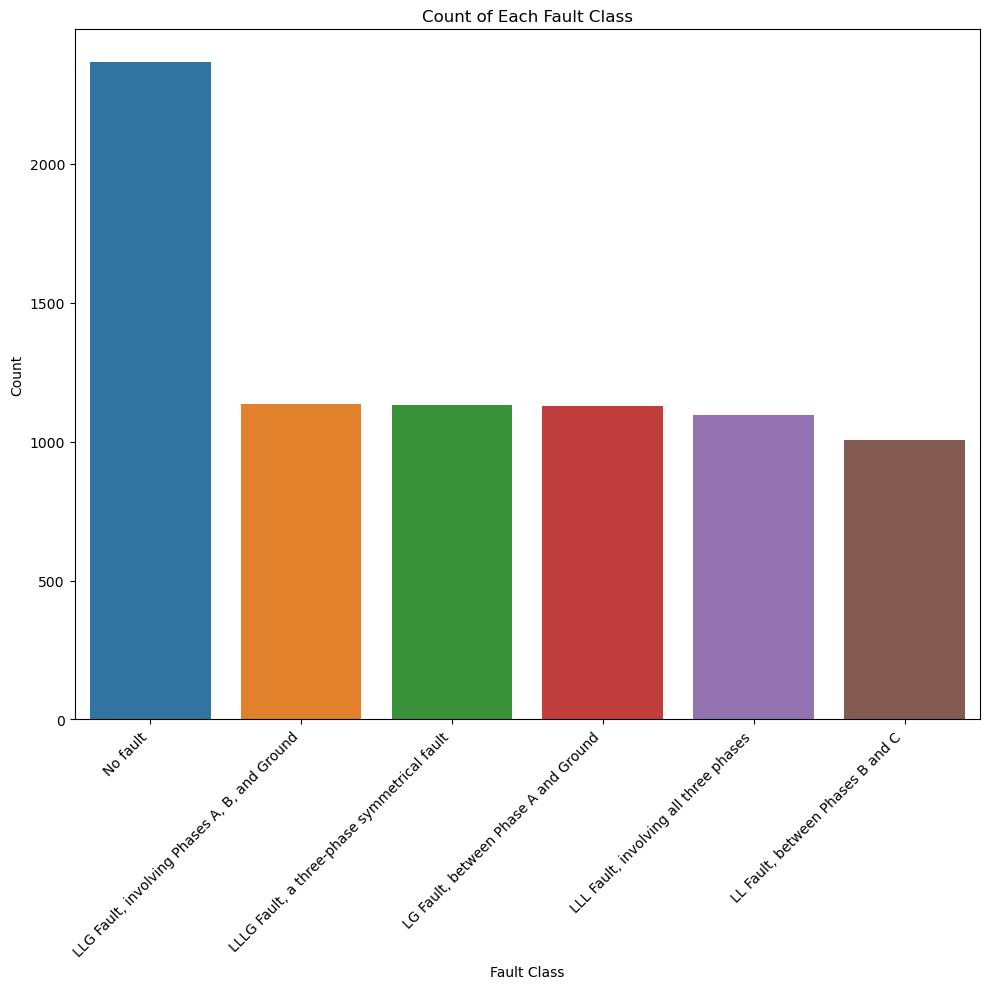

In [26]:
fault_class_counts = df_classdata['Fault Class'].value_counts()

plt.figure(figsize=(10, 10))
sns.barplot(x=fault_class_counts.index, y=fault_class_counts.values)

plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Fault Class')
plt.ylabel('Count')
plt.title('Count of Each Fault Class')

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
fault_class_counts

Fault Class
No fault                                        2365
LLG Fault, involving Phases A, B, and Ground    1134
LLLG Fault, a three-phase symmetrical fault     1133
LG Fault, between Phase A and Ground            1129
LLL Fault, involving all three phases           1096
LL Fault, between Phases B and C                1004
Name: count, dtype: int64

<p> 
    The distribution within the dataset is notably imbalanced, with 'No fault' representing the largest portion, while the various 'fault' categories equally share the remaining distribution.</p>

<h4> Plotting the 3 currents and 3 voltages </h4>

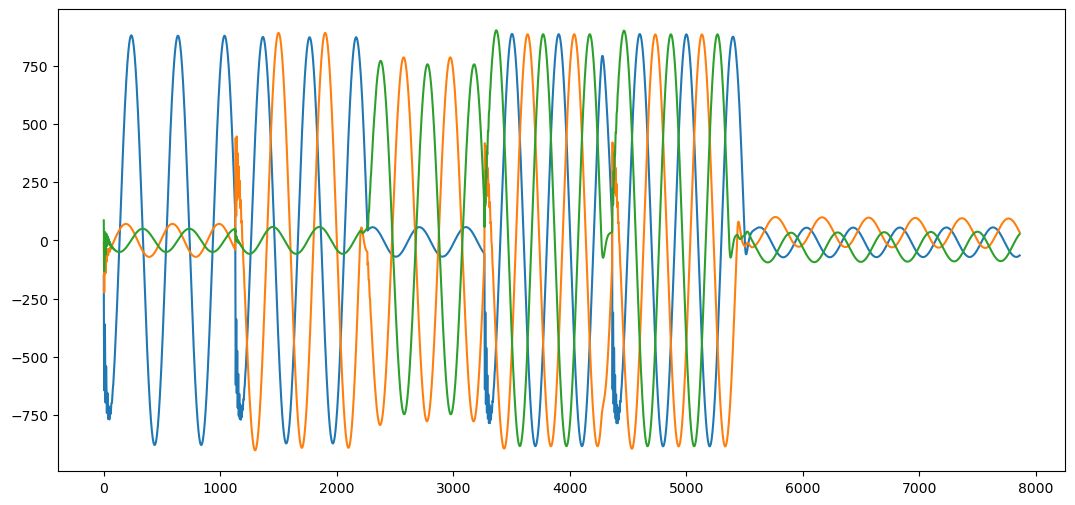

In [28]:
plt.figure(figsize = (13,6))
plt.plot(df_classdata["Ia"])
plt.plot(df_classdata["Ib"])
plt.plot(df_classdata["Ic"])

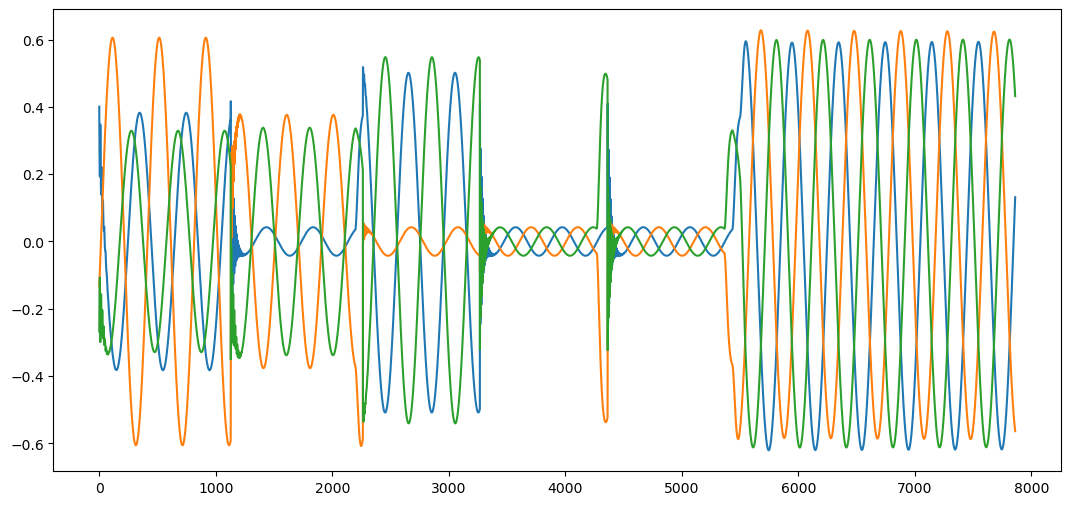

In [117]:
plt.figure(figsize = (13,6))
plt.plot(df_classdata["Va"])
plt.plot(df_classdata["Vb"])
plt.plot(df_classdata["Vc"])

<p> The above graphs clearly display peaks and dips in current and voltage, signaling the occurrence of faults at these specific points. Our objective is to accurately determine the type of fault corresponding to each of these data points. </p>

<h4> Plotting per fault </h4>

In [118]:
fault_class_counts

Fault Class
No fault                                        2365
LLG Fault, involving Phases A, B, and Ground    1134
LLLG Fault, a three-phase symmetrical fault     1133
LG Fault, between Phase A and Ground            1129
LLL Fault, involving all three phases           1096
LL Fault, between Phases B and C                1004
Name: count, dtype: int64

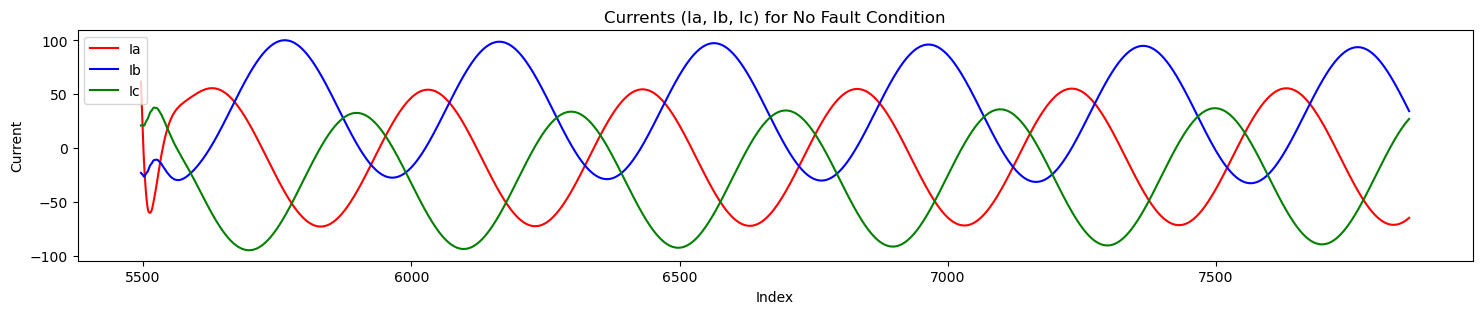

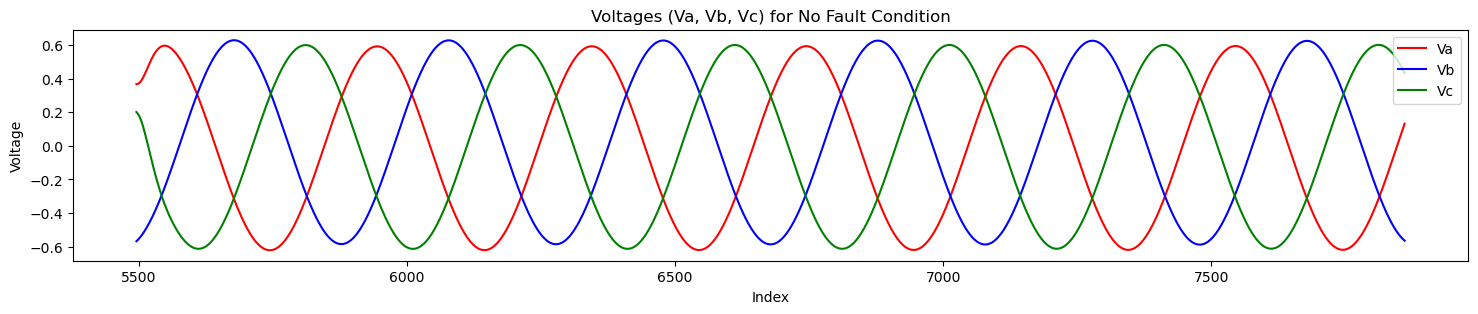

In [119]:
no_fault_i = df_classdata[df_classdata['Fault Class'] == 'No fault']

# Plotting currents
plt.figure(figsize=(18, 3))
plt.plot(no_fault_i["Ia"], 'r', label='Ia')
plt.plot(no_fault_i["Ib"], 'b', label='Ib')
plt.plot(no_fault_i["Ic"], 'g', label='Ic')
plt.xlabel('Index')
plt.ylabel('Current')
plt.title('Currents (Ia, Ib, Ic) for No Fault Condition')
plt.legend()
plt.show()

# Plotting voltages
plt.figure(figsize=(18, 3))
plt.plot(no_fault_i["Va"], 'r', label='Va')
plt.plot(no_fault_i["Vb"], 'b', label='Vb')
plt.plot(no_fault_i["Vc"], 'g', label='Vc')
plt.xlabel('Index')
plt.ylabel('Voltage')
plt.title('Voltages (Va, Vb, Vc) for No Fault Condition')
plt.legend()
plt.show()

<p> The graphs depict the sinusoidal patterns of three-phase currents (Ia, Ib, Ic) and voltages (Va, Vb, Vc) under a 'no fault' condition in an electrical system. Each phase's current and voltage maintain a consistent amplitude and frequency, indicating stable and balanced operations typical of a fault-free state. </p>

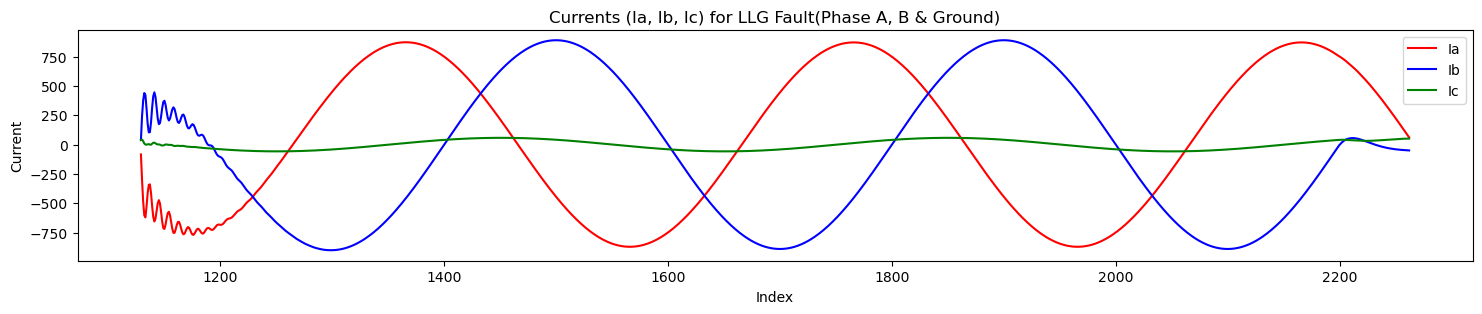

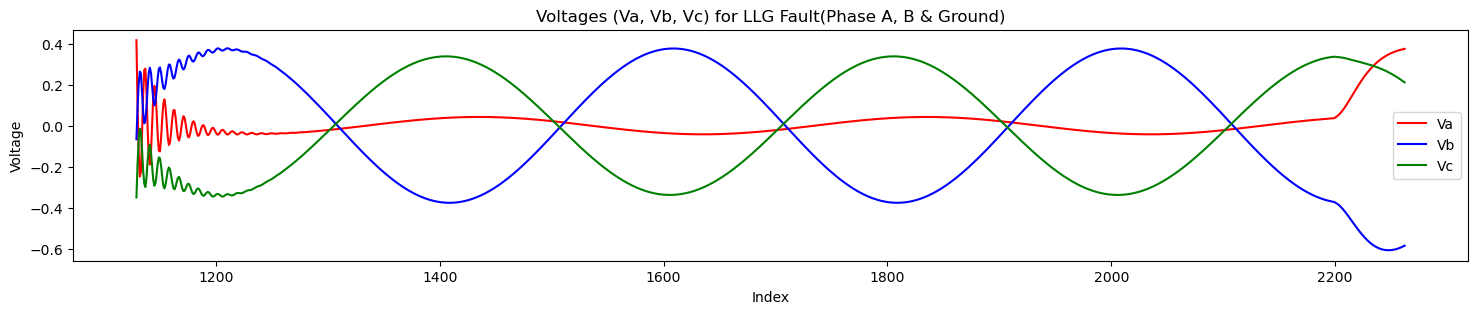

In [120]:
abg_fault = df_classdata[df_classdata['Fault Class']
                         == 'LLG Fault, involving Phases A, B, and Ground']

plt.figure(figsize=(18, 3))
plt.plot(abg_fault["Ia"], 'r', label='Ia')
plt.plot(abg_fault["Ib"], 'b', label='Ib')
plt.plot(abg_fault["Ic"], 'g', label='Ic')
plt.xlabel('Index')
plt.ylabel('Current')
plt.title('Currents (Ia, Ib, Ic) for LLG Fault(Phase A, B & Ground)')
plt.legend()
plt.show()

# Plotting currents


# Plotting voltages
plt.figure(figsize=(18, 3))
plt.plot(abg_fault["Va"], 'r', label='Va')
plt.plot(abg_fault["Vb"], 'b', label='Vb')
plt.plot(abg_fault["Vc"], 'g', label='Vc')
plt.xlabel('Index')
plt.ylabel('Voltage')
plt.title('Voltages (Va, Vb, Vc) for LLG Fault(Phase A, B & Ground)')
plt.legend()
plt.show()

<p>
    The presented graphs illustrate the electrical behavior during an LLG fault involving Phase A, B, and Ground. The current graph shows a significant spike in Phase A and Phase B, indicative of a fault occurrence, while the voltage graph displays a corresponding dip, particularly in Phase A and B. These anomalies signal the presence of an LLG fault, deviating from the normal sinusoidal waveform and highlighting the disruption in electrical flow.
</p>

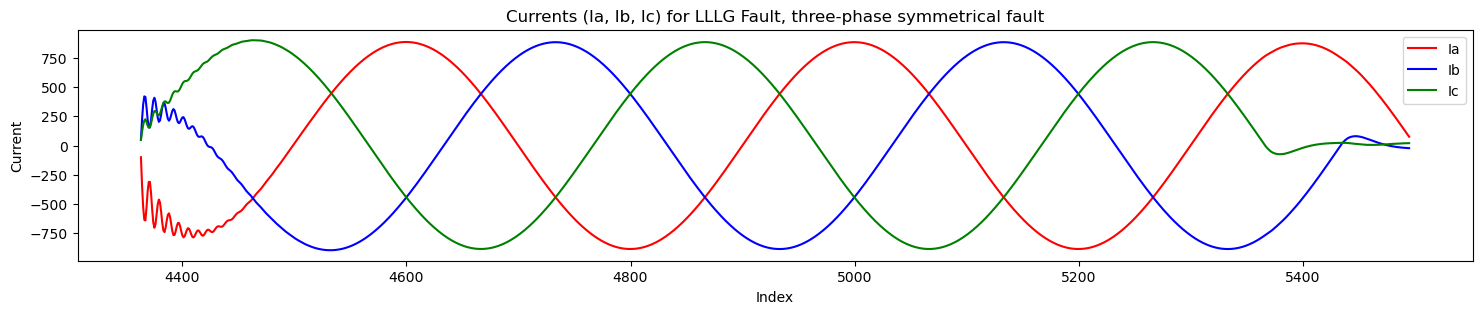

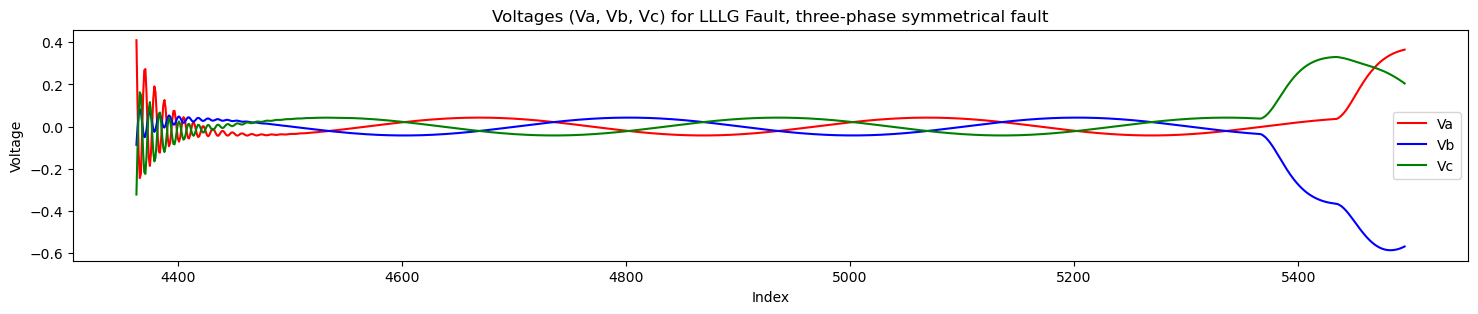

In [121]:
lllg_fault = df_classdata[df_classdata['Fault Class']
                          == 'LLLG Fault, a three-phase symmetrical fault']

plt.figure(figsize=(18, 3))
plt.plot(lllg_fault["Ia"], 'r', label='Ia')
plt.plot(lllg_fault["Ib"], 'b', label='Ib')
plt.plot(lllg_fault["Ic"], 'g', label='Ic')
plt.xlabel('Index')
plt.ylabel('Current')
plt.title('Currents (Ia, Ib, Ic) for LLLG Fault, three-phase symmetrical fault')
plt.legend()
plt.show()

# Plotting currents


# Plotting voltages
plt.figure(figsize=(18, 3))
plt.plot(lllg_fault["Va"], 'r', label='Va')
plt.plot(lllg_fault["Vb"], 'b', label='Vb')
plt.plot(lllg_fault["Vc"], 'g', label='Vc')
plt.xlabel('Index')
plt.ylabel('Voltage')
plt.title('Voltages (Va, Vb, Vc) for LLLG Fault, three-phase symmetrical fault')
plt.legend()
plt.show()

<p>
    In the displayed graphs, we observe the current and voltage characteristics for a LLLG fault, a type of three-phase symmetrical fault. The current graph shows a pronounced disturbance across all three phases, reflecting a severe fault condition. Concurrently, the voltage graph exhibits significant deviations from the norm, with all phases impacted, which is characteristic of a symmetrical fault affecting the entire three-phase system. These visual patterns are indicative of a LLLG fault, denoting a full system disturbance.
</p>

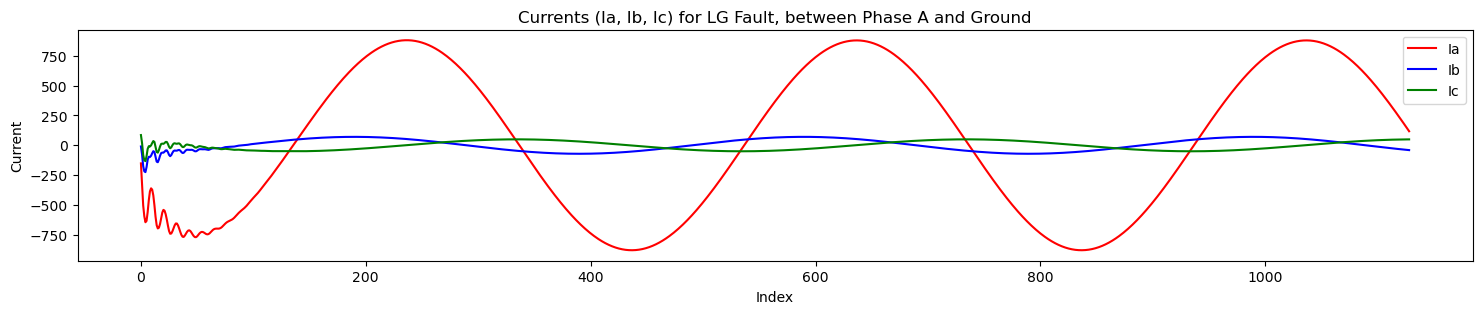

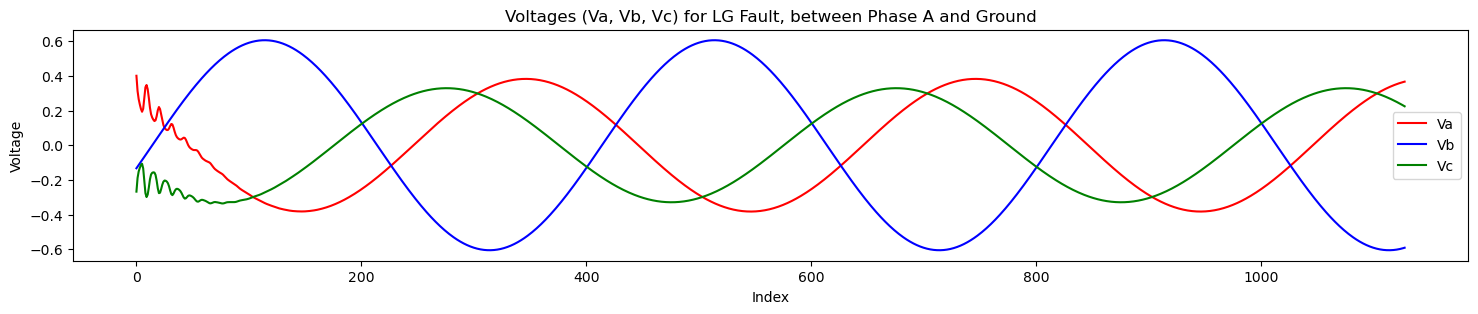

In [122]:
lg_fault = df_classdata[df_classdata['Fault Class']
                        == 'LG Fault, between Phase A and Ground']

plt.figure(figsize=(18, 3))
plt.plot(lg_fault["Ia"], 'r', label='Ia')
plt.plot(lg_fault["Ib"], 'b', label='Ib')
plt.plot(lg_fault["Ic"], 'g', label='Ic')
plt.xlabel('Index')
plt.ylabel('Current')
plt.title('Currents (Ia, Ib, Ic) for LG Fault, between Phase A and Ground')
plt.legend()
plt.show()

# Plotting currents


# Plotting voltages
plt.figure(figsize=(18, 3))
plt.plot(lg_fault["Va"], 'r', label='Va')
plt.plot(lg_fault["Vb"], 'b', label='Vb')
plt.plot(lg_fault["Vc"], 'g', label='Vc')
plt.xlabel('Index')
plt.ylabel('Voltage')
plt.title('Voltages (Va, Vb, Vc) for LG Fault, between Phase A and Ground')
plt.legend()
plt.show()

<p>
    The presented graphs showcase the current and voltage trends for an LG fault between Phase A and Ground. The current graph illustrates a sharp deviation in Phase A, depicted by the red line, indicating a connection to ground, which is a characteristic signature of an LG fault. Meanwhile, the voltage graph for Phase A also shows an abnormal pattern, diverging from the typical sinusoidal waveform, further supporting the presence of an LG fault. The other phases exhibit relatively normal waveforms, underscoring the localized nature of the fault to Phase A.
</p>

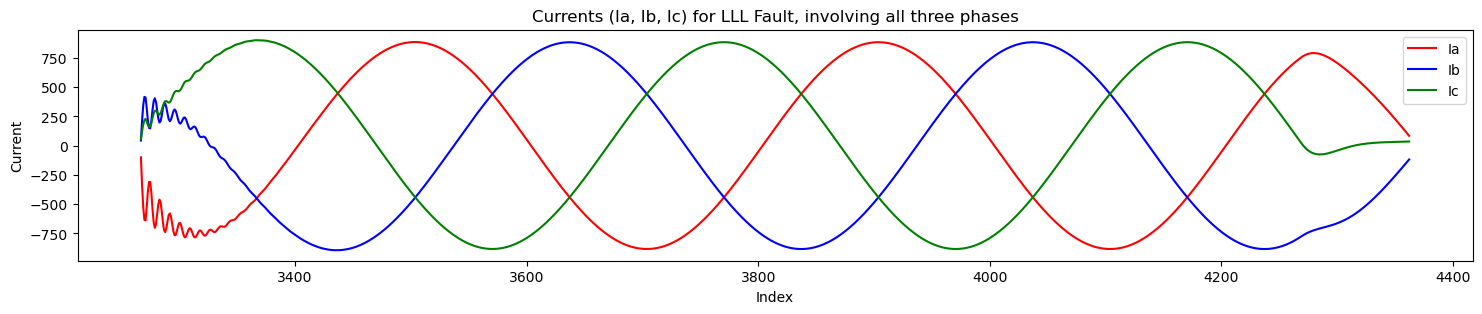

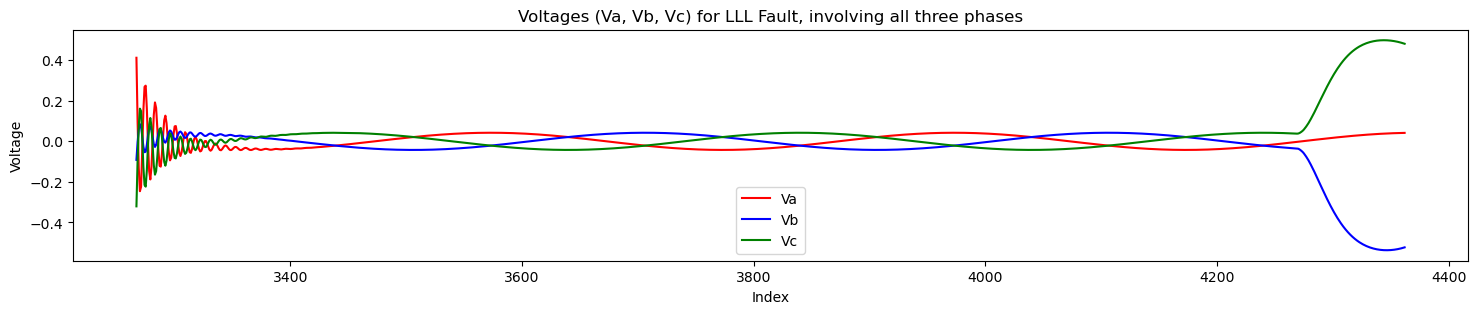

In [123]:
lll_fault = df_classdata[df_classdata['Fault Class']
                         == 'LLL Fault, involving all three phases']

plt.figure(figsize=(18, 3))
plt.plot(lll_fault["Ia"], 'r', label='Ia')
plt.plot(lll_fault["Ib"], 'b', label='Ib')
plt.plot(lll_fault["Ic"], 'g', label='Ic')
plt.xlabel('Index')
plt.ylabel('Current')
plt.title('Currents (Ia, Ib, Ic) for LLL Fault, involving all three phases')
plt.legend()
plt.show()

# Plotting currents


# Plotting voltages
plt.figure(figsize=(18, 3))
plt.plot(lll_fault["Va"], 'r', label='Va')
plt.plot(lll_fault["Vb"], 'b', label='Vb')
plt.plot(lll_fault["Vc"], 'g', label='Vc')
plt.xlabel('Index')
plt.ylabel('Voltage')
plt.title('Voltages (Va, Vb, Vc) for LLL Fault, involving all three phases')
plt.legend()
plt.show()

<p>
    The displayed graphs depict the current and voltage for an LLL fault, involving all three phases. The current traces exhibit significant disturbances across all three phases, with the red, blue, and green lines all showing deviations from the normal sinusoidal pattern, indicative of a multi-phase fault occurrence. Similarly, the voltage graph shows an abnormal flattening across all phases, diverging from the expected waveforms, thus confirming the simultaneous impact on all three phases characteristic of an LLL fault.
</p>

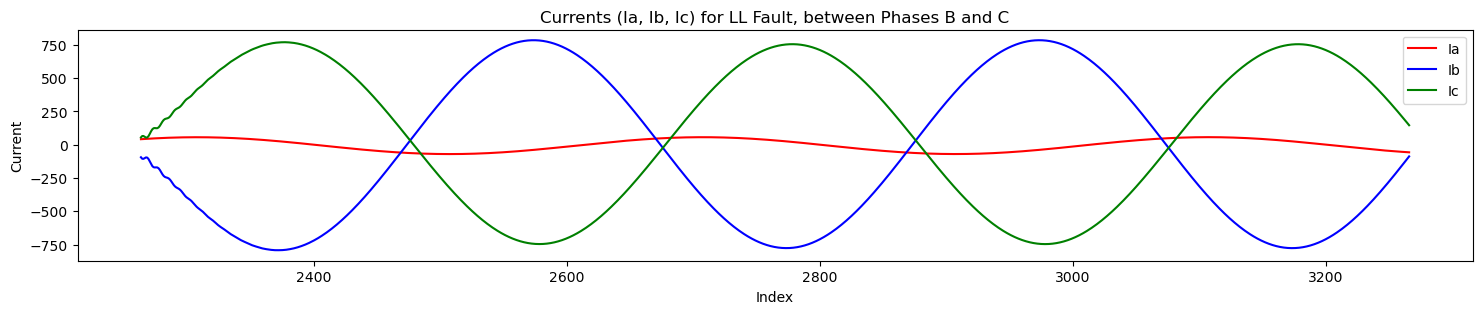

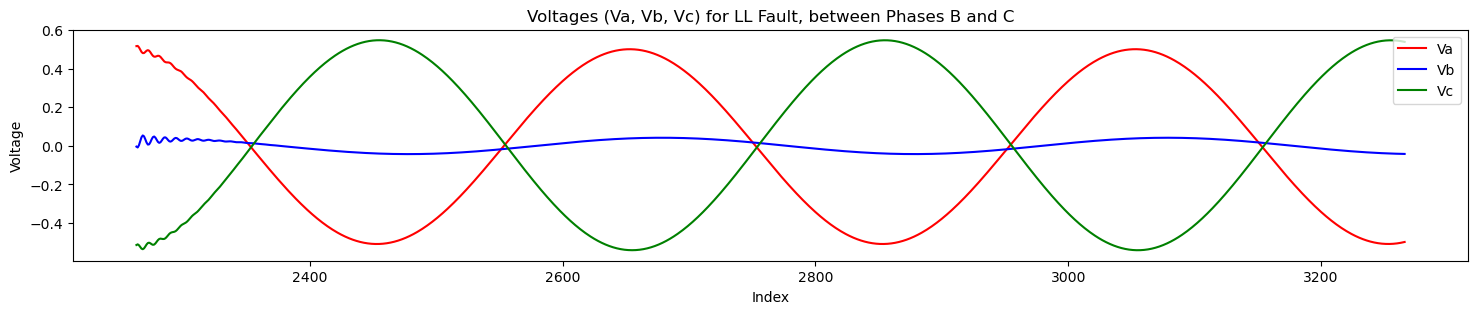

In [124]:
ll_fault = df_classdata[df_classdata['Fault Class'] == 'LL Fault, between Phases B and C' ]

plt.figure(figsize=(18, 3))
plt.plot(ll_fault["Ia"], 'r', label='Ia')
plt.plot(ll_fault["Ib"], 'b', label='Ib')
plt.plot(ll_fault["Ic"], 'g', label='Ic')
plt.xlabel('Index')
plt.ylabel('Current')
plt.title('Currents (Ia, Ib, Ic) for LL Fault, between Phases B and C')
plt.legend()
plt.show()

# Plotting currents


# Plotting voltages
plt.figure(figsize=(18, 3))
plt.plot(ll_fault["Va"], 'r', label='Va')
plt.plot(ll_fault["Vb"], 'b', label='Vb')
plt.plot(ll_fault["Vc"], 'g', label='Vc')
plt.xlabel('Index')
plt.ylabel('Voltage')
plt.title('Voltages (Va, Vb, Vc) for LL Fault, between Phases B and C')
plt.legend()
plt.show()

<p> The graphs display the current and voltage profiles for an LL fault between Phases B and C. The red and blue current traces diverge from their typical sinusoidal pattern, indicating a fault in the electrical system. The voltage traces, particularly in the red and blue, show a point of inflection where the normal phase relationship is disrupted, a characteristic indication of an LL fault between these two phases. These anomalies in the waveform highlight the moments when the fault occurs, providing essential data for fault analysis.
</p>

<h3> Model Building </h3>

<p>
    In the current analysis, nine distinct machine learning models were employed to assess their performance in classifying electrical faults. These models include KNN Classifier, Logistic Regression, SVM, Decision Trees, Random Forest, Gradient Boosting, XGBoost, LightGBM, and CatBoost. The dataset was partitioned using an 80:20 ratio for the training/validation (TrainVal) and holdout sets, ensuring a robust evaluation framework. Data normalization was performed using the MinMaxScaler, which scales each feature to a given range without distorting differences in the ranges of values. To address class imbalance, Synthetic Minority Over-sampling Technique (SMOTE) was applied, enhancing the representativeness of minority classes in the training data. Model validation was rigorously conducted using 5-fold cross-validation, a method that provides a thorough assessment by utilizing multiple train-test splits, thereby increasing the reliability of the evaluation. The F1 score, a balanced metric that accounts for both precision and recall, was chosen as the scoring function (referred to as 'f1-scorer'), offering a comprehensive measure of model accuracy particularly useful when classes are imbalanced.
</p>

In [29]:
Image(url= "https://i.ibb.co/WkHchNQ/Screenshot-2023-12-09-at-4-38-04-PM.png")

In [30]:
df_classdata.head()

#Dropping irrelevant columns
df_features = df_classdata.drop(['A', 'B', 'C', 'G', 'Fault Type', 'Fault Class'], axis=1)

X = df_features.drop(['Fault Numeric Class'],axis=1)
y = df_features['Fault Numeric Class']

Class distribution:
       0
3  1129
1  1134
5  1004
4  1096
2  1133
0  2365
Proportion Chance Criterion (PCC): 18.85%
1.25 * Proportion Chance Criterion: 23.56%


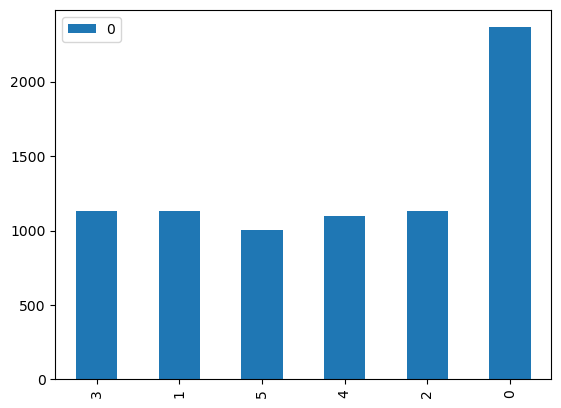

In [31]:
class_counts = Counter(df_features["Fault Numeric Class"])
df_class = pd.DataFrame.from_dict(class_counts, orient="index")

# Plotting the class distribution
df_class.plot(kind="bar")

# Calculating the Proportion Chance Criterion (PCC)
proportions = df_class[0] / df_class[0].sum()
pcc = np.sum(proportions**2)

# Calculating 1.25 times PCC
augmented_pcc = 1.25 * pcc

print("Class distribution:\n", df_class)
print("Proportion Chance Criterion (PCC): {:.2f}%".format(100 * pcc))
print(
    "1.25 * Proportion Chance Criterion: {:.2f}%".format(100 * augmented_pcc))

<p>
    The calculated Proportion Chance Criterion (PCC) for the dataset is 18.85%. This indicates that if a classifier were to randomly guess the class of each sample, it would be correct approximately 18.85% of the time, purely by chance, given the current class distribution. An adjusted threshold, set at 1.25 times the PCC, is 23.56%. A classifier would therefore need to surpass this adjusted threshold of 23.56% accuracy to be considered as having predictive power beyond random chance.
</p>

In [32]:
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=0.20, random_state=143
)

In [33]:
print(f'X_trainval: {X_trainval.shape}')
print(f'X_holdout: {X_holdout.shape}')
print(f'y_trainval: {y_trainval.shape}')
print(f'y_holdout: {y_holdout.shape}')

X_trainval: (6288, 6)
X_holdout: (1573, 6)
y_trainval: (6288,)
y_holdout: (1573,)


KNeighbors cross-validation F1 score: 0.802
KNeighbors holdout set F1 score: 0.778
KNeighbors prediction distribution: {0: 501, 1: 211, 2: 211, 3: 241, 4: 207, 5: 202}
KNeighbors training and prediction time: 0.44 seconds

Confusion matrix for KNeighbors:
[[501   0   0   0   0   0]
 [  0 203   0   6   0   0]
 [  0   7  73   0 128   0]
 [  0   1   0 235   0   0]
 [  0   0 138   0  78   0]
 [  0   0   0   0   1 202]]



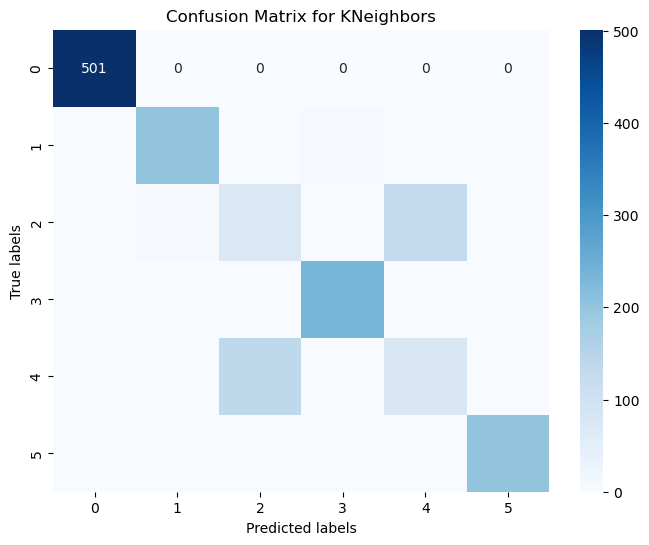

LogisticRegression cross-validation F1 score: 0.152
LogisticRegression holdout set F1 score: 0.159
LogisticRegression prediction distribution: {0: 1440, 1: 27, 2: 1, 4: 105}
LogisticRegression training and prediction time: 0.83 seconds

Confusion matrix for LogisticRegression:
[[501   0   0   0   0   0]
 [182  27   0   0   0   0]
 [173   0   0   0  35   0]
 [236   0   0   0   0   0]
 [182   0   0   0  34   0]
 [166   0   1   0  36   0]]



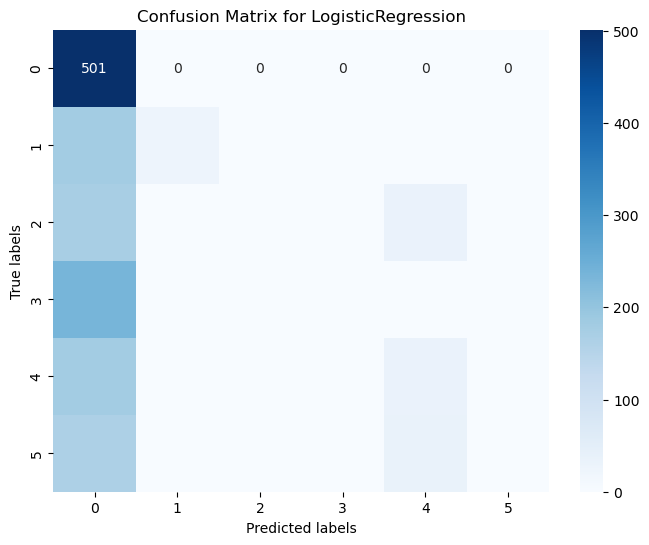

DecisionTree cross-validation F1 score: 0.840
DecisionTree holdout set F1 score: 0.862
DecisionTree prediction distribution: {0: 500, 1: 213, 2: 213, 3: 235, 4: 209, 5: 203}
DecisionTree training and prediction time: 0.41 seconds

Confusion matrix for DecisionTree:
[[500   0   1   0   0   0]
 [  0 209   0   0   0   0]
 [  0   3 124   0  81   0]
 [  0   0   0 235   0   1]
 [  0   1  87   0 128   0]
 [  0   0   1   0   0 202]]



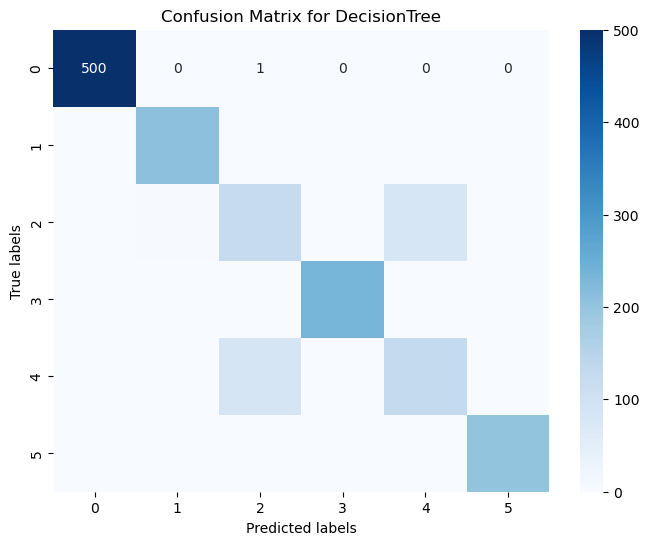

RandomForest cross-validation F1 score: 0.838
RandomForest holdout set F1 score: 0.854
RandomForest prediction distribution: {0: 500, 1: 209, 2: 223, 3: 235, 4: 203, 5: 203}
RandomForest training and prediction time: 7.07 seconds

Confusion matrix for RandomForest:
[[500   0   1   0   0   0]
 [  0 209   0   0   0   0]
 [  0   0 123   0  85   0]
 [  0   0   0 235   1   0]
 [  0   0  99   0 117   0]
 [  0   0   0   0   0 203]]



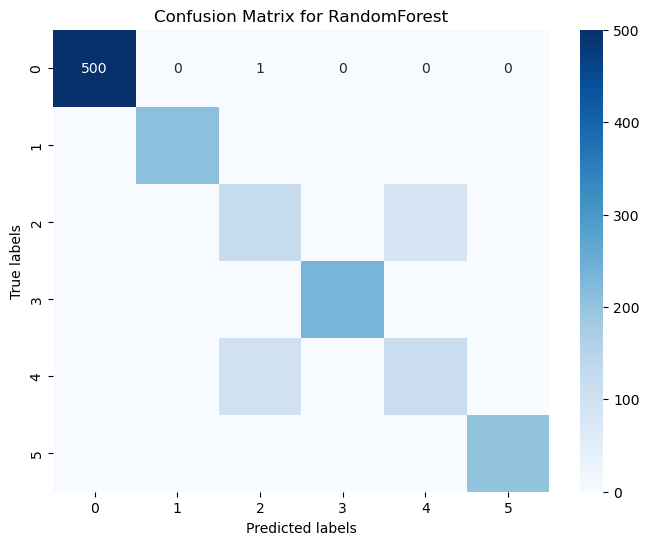

GradientBoosting cross-validation F1 score: 0.815
GradientBoosting holdout set F1 score: 0.799
GradientBoosting prediction distribution: {0: 500, 1: 212, 2: 234, 3: 240, 4: 184, 5: 203}
GradientBoosting training and prediction time: 60.67 seconds

Confusion matrix for GradientBoosting:
[[500   0   1   0   0   0]
 [  0 205   0   4   0   0]
 [  0   5  97   0 106   0]
 [  0   0   0 236   0   0]
 [  0   2 136   0  78   0]
 [  0   0   0   0   0 203]]



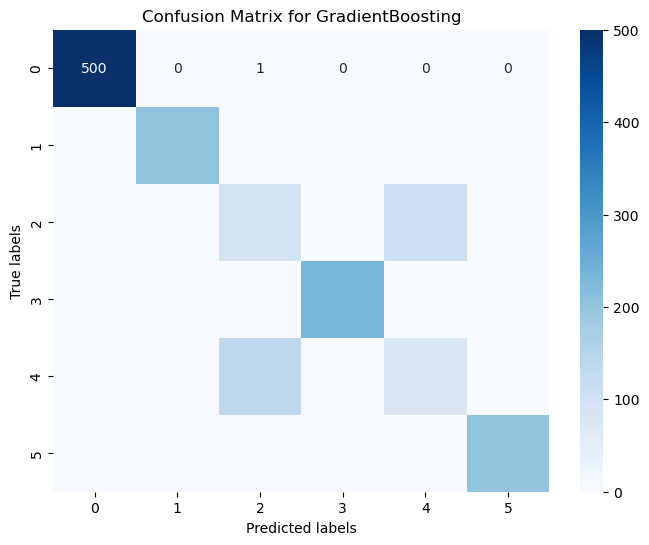

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

f1_scorer = make_scorer(f1_score, average='macro')

classifiers = [
    ('KNeighbors', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(max_iter=10000, random_state=143)),
    ('DecisionTree', DecisionTreeClassifier(random_state=143)),
    ('RandomForest', RandomForestClassifier(random_state=143)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=143)),
    ('XGBClassifier', XGBClassifier(random_state=143)),
    ('SVM', SVC(random_state=143)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

def create_pipeline(scaler, classifier):
    return Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
    ])

for name, classifier in classifiers:
    start_time = time.time()

    pipeline = create_pipeline(MinMaxScaler(), classifier)
    cv_scores = cross_val_score(
        pipeline, X_trainval, y_trainval, cv=5, scoring=f1_scorer)

    pipeline.fit(X_trainval, y_trainval)
    holdout_predictions = pipeline.predict(X_holdout)

    # End timing
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print F1 score, prediction distribution, and runtime
    holdout_f1_score = f1_score(
        y_holdout, holdout_predictions, average='macro')
    unique, counts = np.unique(holdout_predictions, return_counts=True)
    print(f"{name} cross-validation F1 score: {cv_scores.mean():.3f}")
    print(f"{name} holdout set F1 score: {holdout_f1_score:.3f}")
    print(f"{name} prediction distribution: {dict(zip(unique, counts))}")
    print(f"{name} training and prediction time: {elapsed_time:.2f} seconds\n")

    # Compute the confusion matrix
    cm = confusion_matrix(y_holdout, holdout_predictions)
    print(f"Confusion matrix for {name}:\n{cm}\n")

    # Plot the confusion matrix with linear color scale and fixed annotation format
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=np.max(cm))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

CatBoost cross-validation F1 score: 0.791
CatBoost holdout set F1 score: 0.774
CatBoost prediction distribution: {0: 500, 1: 206, 2: 214, 3: 238, 4: 212, 5: 203}
CatBoost training and prediction time: 271.39 seconds

Confusion matrix for CatBoost:
[[500   0   1   0   0   0]
 [  0 206   0   3   0   0]
 [  0   0  69   0 139   0]
 [  0   0   0 235   1   0]
 [  0   0 144   0  72   0]
 [  0   0   0   0   0 203]]



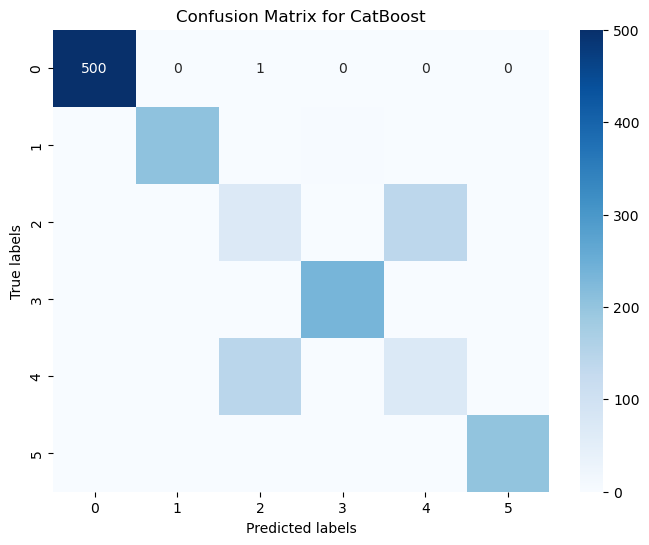

In [34]:
warnings.filterwarnings("ignore", category=UserWarning)

f1_scorer = make_scorer(f1_score, average='macro')

classifiers = [
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

def create_pipeline(scaler, classifier):
    return Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
    ])

for name, classifier in classifiers:
    start_time = time.time()

    pipeline = create_pipeline(MinMaxScaler(), classifier)
    cv_scores = cross_val_score(
        pipeline, X_trainval, y_trainval, cv=5, scoring=f1_scorer)

    pipeline.fit(X_trainval, y_trainval)
    holdout_predictions = pipeline.predict(X_holdout)

    # End timing
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print F1 score, prediction distribution, and runtime
    holdout_f1_score = f1_score(
        y_holdout, holdout_predictions, average='macro')
    unique, counts = np.unique(holdout_predictions, return_counts=True)
    print(f"{name} cross-validation F1 score: {cv_scores.mean():.3f}")
    print(f"{name} holdout set F1 score: {holdout_f1_score:.3f}")
    print(f"{name} prediction distribution: {dict(zip(unique, counts))}")
    print(f"{name} training and prediction time: {elapsed_time:.2f} seconds\n")

    # Compute the confusion matrix
    cm = confusion_matrix(y_holdout, holdout_predictions)
    print(f"Confusion matrix for {name}:\n{cm}\n")

    # Plot the confusion matrix with linear color scale and fixed annotation format
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=np.max(cm))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

XGBClassifier cross-validation F1 score: 0.830
XGBClassifier holdout set F1 score: 0.822
XGBClassifier prediction distribution: {0: 500, 1: 206, 2: 226, 3: 239, 4: 199, 5: 203}
XGBClassifier training and prediction time: 280.71 seconds

Confusion matrix for XGBClassifier:
[[500   0   0   1   0   0]
 [  0 206   0   3   0   0]
 [  0   0 106   0 102   0]
 [  0   0   0 235   1   0]
 [  0   0 120   0  96   0]
 [  0   0   0   0   0 203]]



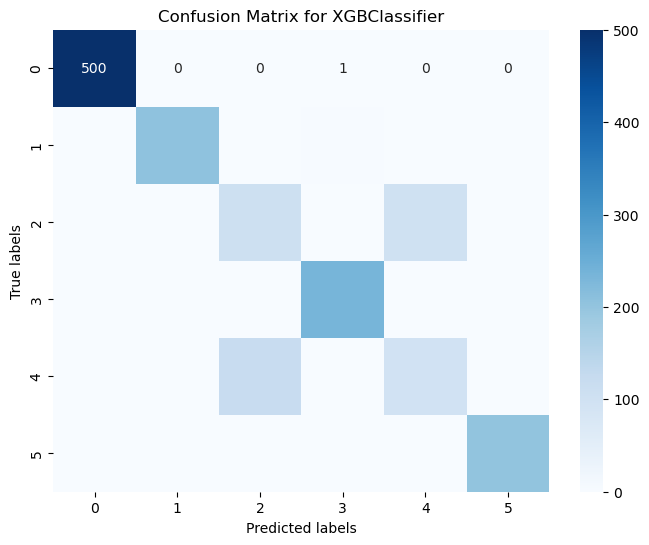

SVM cross-validation F1 score: 0.770
SVM holdout set F1 score: 0.773
SVM prediction distribution: {0: 531, 1: 228, 2: 264, 3: 229, 4: 141, 5: 180}
SVM training and prediction time: 6.27 seconds

Confusion matrix for SVM:
[[501   0   0   0   0   0]
 [  0 201   0   8   0   0]
 [  0  14 117   3  74   0]
 [ 14   4   0 218   0   0]
 [  0   9 140   0  67   0]
 [ 16   0   7   0   0 180]]



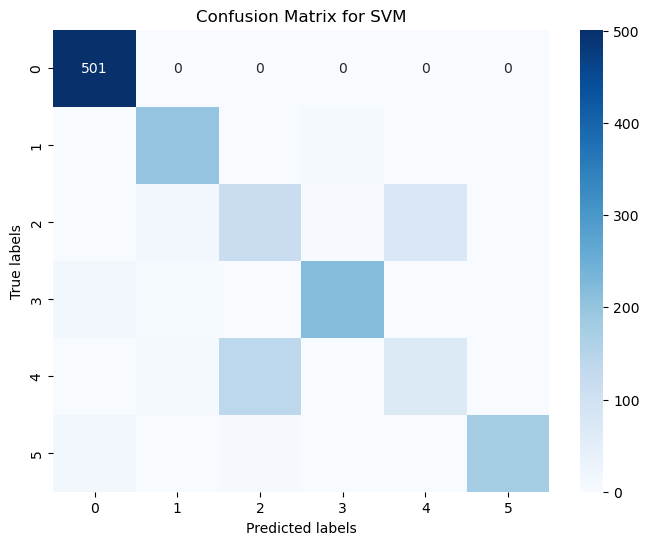

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 5030, number of used features: 6
[LightGBM] [Info] Start training from score -1.215302
[LightGBM] [Info] Start training from score -1.916525
[LightGBM] [Info] Start training from score -1.916525
[LightGBM] [Info] Start training from score -1.952292
[LightGBM] [Info] Start training from score -1.966397
[LightGBM] [Info] Start training from score -2.061707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 5030, number of used features: 6
[LightGBM] [Info] Start tra

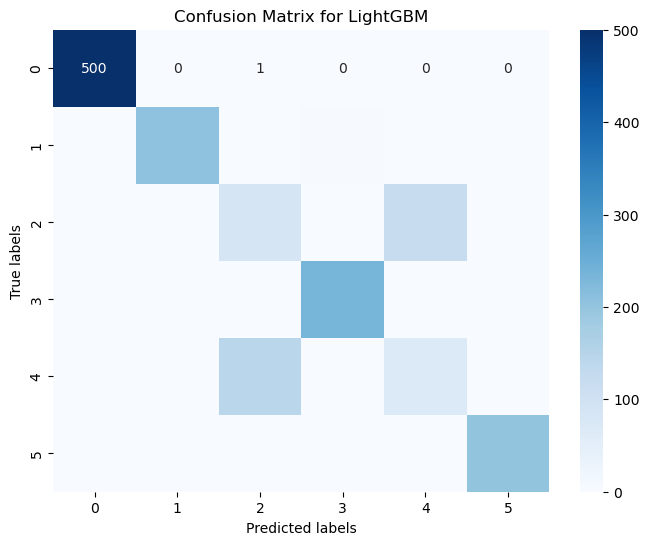

In [35]:
warnings.filterwarnings("ignore", category=UserWarning)

f1_scorer = make_scorer(f1_score, average='macro')

classifiers = [
    ('XGBClassifier', XGBClassifier(random_state=143)),
    ('SVM', SVC(random_state=143)),
    ('LightGBM', LGBMClassifier(random_state=42))
]

def create_pipeline(scaler, classifier):
    return Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
    ])

for name, classifier in classifiers:
    start_time = time.time()

    pipeline = create_pipeline(MinMaxScaler(), classifier)
    cv_scores = cross_val_score(
        pipeline, X_trainval, y_trainval, cv=5, scoring=f1_scorer)

    pipeline.fit(X_trainval, y_trainval)
    holdout_predictions = pipeline.predict(X_holdout)

    # End timing
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print F1 score, prediction distribution, and runtime
    holdout_f1_score = f1_score(
        y_holdout, holdout_predictions, average='macro')
    unique, counts = np.unique(holdout_predictions, return_counts=True)
    print(f"{name} cross-validation F1 score: {cv_scores.mean():.3f}")
    print(f"{name} holdout set F1 score: {holdout_f1_score:.3f}")
    print(f"{name} prediction distribution: {dict(zip(unique, counts))}")
    print(f"{name} training and prediction time: {elapsed_time:.2f} seconds\n")

    # Compute the confusion matrix
    cm = confusion_matrix(y_holdout, holdout_predictions)
    print(f"Confusion matrix for {name}:\n{cm}\n")

    # Plot the confusion matrix with linear color scale and fixed annotation format
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=np.max(cm))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [36]:
Image(url= "https://i.ibb.co/DWFmVvb/Screenshot-2023-12-09-at-7-41-03-AM.png")

<p> The results presented in the table compare the baseline models based on their F1 scores on a combined training and validation dataset (TrainVal) and their runtime performance. </p>
<ul>
    <li> KNN Classifier: Achieved an F1 score of 0.802 with a runtime of 0.43 seconds. </li>
    <li> Logistic Regression: Had a significantly lower F1 score of 0.152, taking 0.83 seconds to run, which suggests it may not be suitable for this specific problem. </li>
    <li> Decision Tree: Scored an F1 of 0.840, one of the highest, with a very efficient runtime of 0.41 seconds. </li>
    <li> Random Forest: Also performed well with an F1 score of 0.838 but with a higher runtime of 7.15 seconds compared to Decision Tree. </li>
    <li> Gradient Boosting: Achieved an F1 score of 0.815, taking 60.14 seconds which is considerably longer than the models above. </li>
    <li> XGBClassifier: Had an F1 score of 0.830 but required a much longer runtime of 356.72 seconds, which may be a drawback in time-sensitive applications. </li>
    <li> SVM: Scored lower on the F1 metric with 0.770 and a runtime of 6.07 seconds. </li>
    <li> LightGBM: Performed well with an F1 score of 0.800 and a faster runtime of 2.77 seconds. </li>
    <li> CatBoost: Recorded an F1 score of 0.791 with a runtime of 278.71 seconds. </li>
</ul>

<p> Highlighted in yellow, the Decision Tree and Random Forest classifiers stand out for their high F1 scores combined with relatively low runtimes, especially the Decision Tree which is the fastest. The runtime indicates how long each model took to complete its training and prediction tasks. A lower runtime is typically better, particularly in systems where speed is crucial. <p>

<p> 
    However, the table suggests a trade-off between predictive performance (as measured by the F1 score) and computational efficiency (as measured by runtime). For instance, the XGBClassifier, while having a high F1 score, took significantly longer to run compared to other models. Decision Trees, on the other hand, provided the best balance between high F1 score and low runtime, making them potentially the most suitable model for this application based on the provided metrics. <p>

<h3> Feature Engineering with Scaling</h3>

<p>
    In this phase of the study, leveraging domain knowledge, several derived features were crafted from the original dataset to investigate their potential impact on model performance and the precision of fault prediction. The significance and the rationale behind these engineered features will be elucidated in subsequent sections of this notebook. For data normalization, the MinMaxScaler was consistently applied across all features to ensure uniform scaling within a specified range, maintaining the original distribution of values. Additionally, to counteract the imbalance within the training dataset, the Synthetic Minority Over-sampling Technique (SMOTE) was implemented, aimed at equalizing the representation of all classes and thus, enhancing the robustness of the predictive models.
</p> 

In [37]:
df_classdata

,A,B,C,G,Ia,Ib,Ic,Va,Vb,Vc,Fault Type,Fault Class,Fault Numeric Class
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,"LG Fault, between Phase A and Ground",3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,"LG Fault, between Phase A and Ground",3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,"LG Fault, between Phase A and Ground",3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,"LG Fault, between Phase A and Ground",3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,"LG Fault, between Phase A and Ground",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000,No fault,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000,No fault,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000,No fault,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000,No fault,0


In [38]:
# Define the original features
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

# Feature Engineering: Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_classdata[features])

# Creating a DataFrame with the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features))
poly_features_df.head()

,Ia,Ib,Ic,Va,Vb,Vc,Ia^2,Ia Ib,Ia Ic,Ia Va,...,Ic^2,Ic Va,Ic Vb,Ic Vc,Va^2,Va Vb,Va Vc,Vb^2,Vb Vc,Vc^2
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,22889.212499,1464.119186,-12980.862053,-60.630172,...,7361.667844,34.384402,-11.405840,-22.978562,0.160600,-0.053274,-0.107327,0.017672,0.035602,0.071725
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,113021.149371,25645.378631,-6161.921773,-105.136155,...,335.948450,5.732031,-2.266059,-3.465972,0.097801,-0.038664,-0.059137,0.015285,0.023379,0.035758
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,252899.944252,87829.020905,40696.332111,-133.632598,...,6548.801156,-21.503985,9.249750,12.254235,0.070612,-0.030373,-0.040239,0.013065,0.017308,0.022930
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,352766.986396,129303.147985,74178.547188,-139.879576,...,15597.992655,-29.413364,13.106190,16.307174,0.055465,-0.024715,-0.030751,0.011012,0.013702,0.017049
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,414302.852236,144283.267892,85145.635467,-134.871266,...,17498.743250,-27.718128,12.640119,15.078009,0.043906,-0.020022,-0.023884,0.009131,0.010892,0.012992


In [39]:
# Adding new features based on domain knowledge

# Zero Sequence Components for Current and Voltage
poly_features_df['ZeroSeqCurrent'] = (poly_features_df['Ia'] + poly_features_df['Ib'] + poly_features_df['Ic']) / 3
poly_features_df['ZeroSeqVoltage'] = (poly_features_df['Va'] + poly_features_df['Vb'] + poly_features_df['Vc']) / 3

# Phase Angle Differences (approximated by product of current and voltage)
poly_features_df['PhaseAngleDiffI'] = poly_features_df['Ia'] * poly_features_df['Ib'] * poly_features_df['Ic']
poly_features_df['PhaseAngleDiffV'] = poly_features_df['Va'] * poly_features_df['Vb'] * poly_features_df['Vc']

# Total Harmonic Distortion (THD) - Approximation
poly_features_df['THD_Ia'] = np.sqrt(poly_features_df['Ib^2'] + poly_features_df['Ic^2']) / poly_features_df['Ia']
poly_features_df['THD_Ib'] = np.sqrt(poly_features_df['Ia^2'] + poly_features_df['Ic^2']) / poly_features_df['Ib']
poly_features_df['THD_Ic'] = np.sqrt(poly_features_df['Ia^2'] + poly_features_df['Ib^2']) / poly_features_df['Ic']

# Total Harmonic Distortion (THD) - Approximation
poly_features_df['THD_Va'] = np.sqrt(poly_features_df['Vb^2'] + poly_features_df['Vc^2']) / poly_features_df['Va']
poly_features_df['THD_Vb'] = np.sqrt(poly_features_df['Va^2'] + poly_features_df['Vc^2']) / poly_features_df['Vb']
poly_features_df['THD_Vc'] = np.sqrt(poly_features_df['Va^2'] + poly_features_df['Vb^2']) / poly_features_df['Vc']

# Voltage and Current Ratios
poly_features_df['V_I_Ratio_A'] = poly_features_df['Va'] / poly_features_df['Ia']
poly_features_df['V_I_Ratio_B'] = poly_features_df['Vb'] / poly_features_df['Ib']
poly_features_df['V_I_Ratio_C'] = poly_features_df['Vc'] / poly_features_df['Ic']

poly_features_df.head()

,Ia,Ib,Ic,Va,Vb,Vc,Ia^2,Ia Ib,Ia Ic,Ia Va,...,PhaseAngleDiffV,THD_Ia,THD_Ib,THD_Ic,THD_Va,THD_Vb,THD_Vc,V_I_Ratio_A,V_I_Ratio_B,V_I_Ratio_C
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,22889.212499,1464.119186,-12980.862053,-60.630172,...,0.014267,-0.570713,-17.972480,1.766908,0.746083,-3.625844,-1.576547,-0.002649,0.013737,-0.003121
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,113021.149371,25645.378631,-6161.921773,-105.136155,...,0.007311,-0.233366,-4.413622,18.808126,0.722434,-2.955988,-1.778347,-0.000930,0.001621,-0.010317
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,252899.944252,87829.020905,40696.332111,-133.632598,...,0.004599,-0.382758,-2.916501,-6.578403,0.713975,-2.675803,-1.910275,-0.000528,0.000654,0.001871
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,352766.986396,129303.147985,74178.547188,-139.879576,...,0.003227,-0.422573,-2.787880,-5.065046,0.711282,-2.566069,-1.974666,-0.000397,0.000482,0.001045
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,414302.852236,144283.267892,85145.635467,-134.871266,...,0.002282,-0.404374,-2.931468,-5.152440,0.709837,-2.496320,-2.020439,-0.000326,0.000426,0.000862


In [40]:
poly_features_df.columns

Index(['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Ia^2', 'Ia Ib', 'Ia Ic', 'Ia Va',
       'Ia Vb', 'Ia Vc', 'Ib^2', 'Ib Ic', 'Ib Va', 'Ib Vb', 'Ib Vc', 'Ic^2',
       'Ic Va', 'Ic Vb', 'Ic Vc', 'Va^2', 'Va Vb', 'Va Vc', 'Vb^2', 'Vb Vc',
       'Vc^2', 'ZeroSeqCurrent', 'ZeroSeqVoltage', 'PhaseAngleDiffI',
       'PhaseAngleDiffV', 'THD_Ia', 'THD_Ib', 'THD_Ic', 'THD_Va', 'THD_Vb',
       'THD_Vc', 'V_I_Ratio_A', 'V_I_Ratio_B', 'V_I_Ratio_C'],
      dtype='object')

In [41]:
features_list = list(poly_features_df.columns)

In [42]:
#Using the polyfeatures

X = poly_features_df
y = df_features['Fault Numeric Class']

In [43]:
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=0.20, random_state=143
)

In [44]:
print(f'X_trainval: {X_trainval.shape}')
print(f'X_holdout: {X_holdout.shape}')
print(f'y_trainval: {y_trainval.shape}')
print(f'y_holdout: {y_holdout.shape}')

X_trainval: (6288, 40)
X_holdout: (1573, 40)
y_trainval: (6288,)
y_holdout: (1573,)


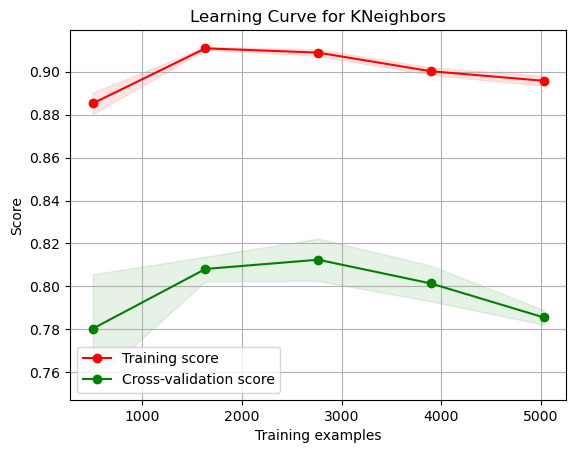

KNeighbors Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

KNeighbors cross-validation F1 score: 0.786
KNeighbors holdout set F1 score: 0.774
KNeighbors prediction distribution: {0: 500, 1: 205, 2: 214, 3: 240, 4: 211, 5: 203}
KNeighbors Prediction time: 0.12 seconds

Confusion matrix for KNeighbors:
[[500   0   1   0   0   0]
 [  0 204   0   5   0   0]
 [  0   0  70   0 138   0]
 [  0   1   0 235   0   0]
 [  0   0 143   0  73   0]
 [  0   0   0   0   0 203]]



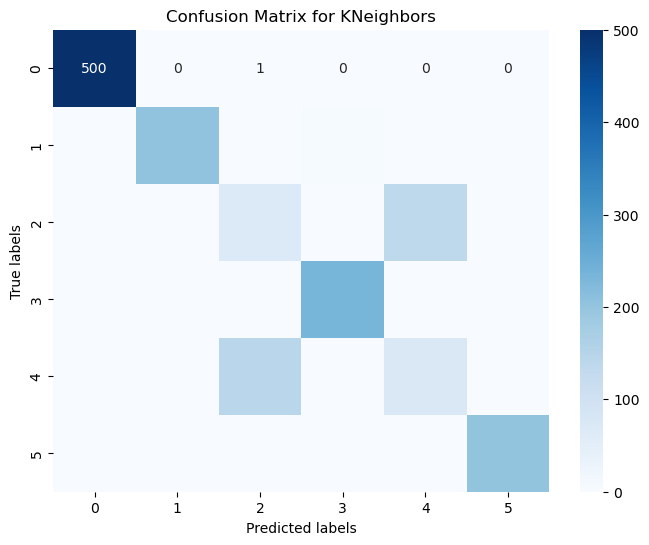

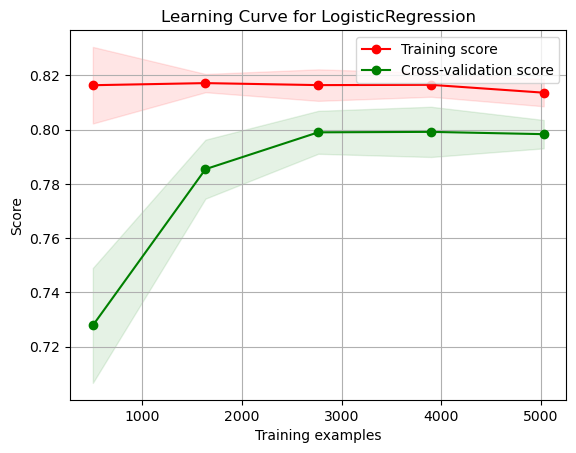

LogisticRegression Parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 143, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

LogisticRegression cross-validation F1 score: 0.798
LogisticRegression holdout set F1 score: 0.825
LogisticRegression prediction distribution: {0: 500, 1: 212, 2: 207, 3: 249, 4: 203, 5: 202}
LogisticRegression Prediction time: 0.02 seconds

Confusion matrix for LogisticRegression:
[[496   0   0   5   0   0]
 [  0 202   0   7   0   0]
 [  0   9 105   5  89   0]
 [  2   1   0 232   0   1]
 [  0   0 102   0 114   0]
 [  2   0   0   0   0 201]]



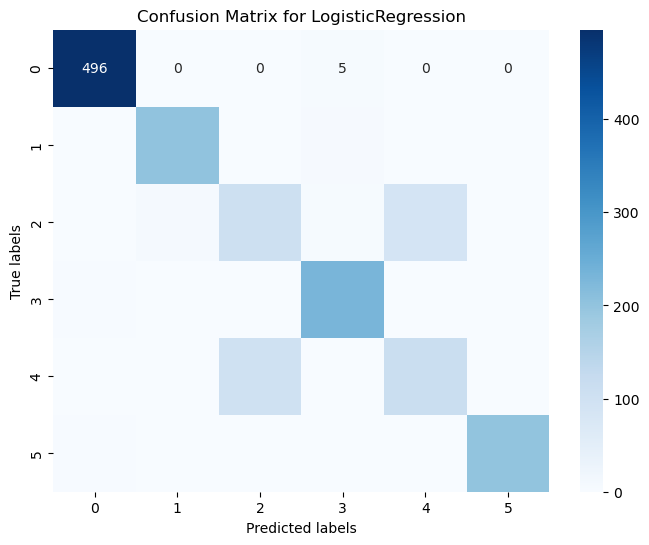

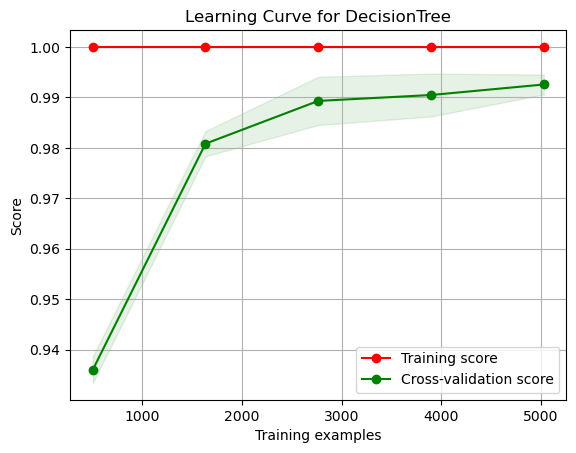

DecisionTree Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 143, 'splitter': 'best'}

DecisionTree cross-validation F1 score: 0.993
DecisionTree holdout set F1 score: 0.998
DecisionTree prediction distribution: {0: 501, 1: 209, 2: 209, 3: 234, 4: 216, 5: 204}
DecisionTree Prediction time: 0.00 seconds

Confusion matrix for DecisionTree:
[[500   0   0   0   0   1]
 [  0 209   0   0   0   0]
 [  0   0 208   0   0   0]
 [  1   0   1 234   0   0]
 [  0   0   0   0 216   0]
 [  0   0   0   0   0 203]]



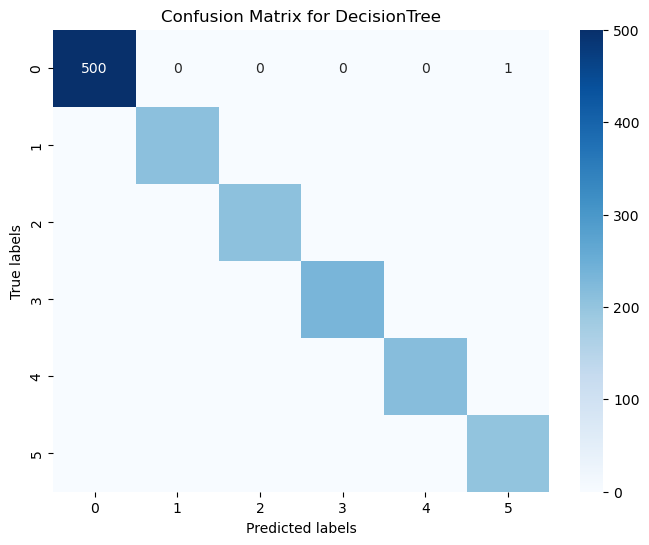

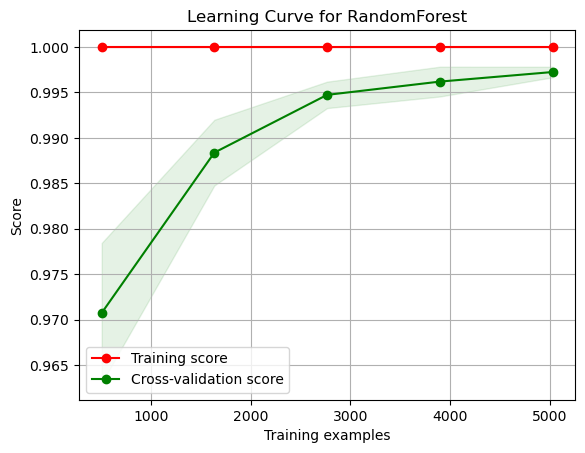

RandomForest Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 143, 'verbose': 0, 'warm_start': False}

RandomForest cross-validation F1 score: 0.997
RandomForest holdout set F1 score: 0.999
RandomForest prediction distribution: {0: 501, 1: 209, 2: 207, 3: 236, 4: 217, 5: 203}
RandomForest Prediction time: 0.04 seconds

Confusion matrix for RandomForest:
[[501   0   0   0   0   0]
 [  0 209   0   0   0   0]
 [  0   0 207   0   1   0]
 [  0   0   0 236   0   0]
 [  0   0   0   0 216   0]
 [  0   0   0   0   0 203]]



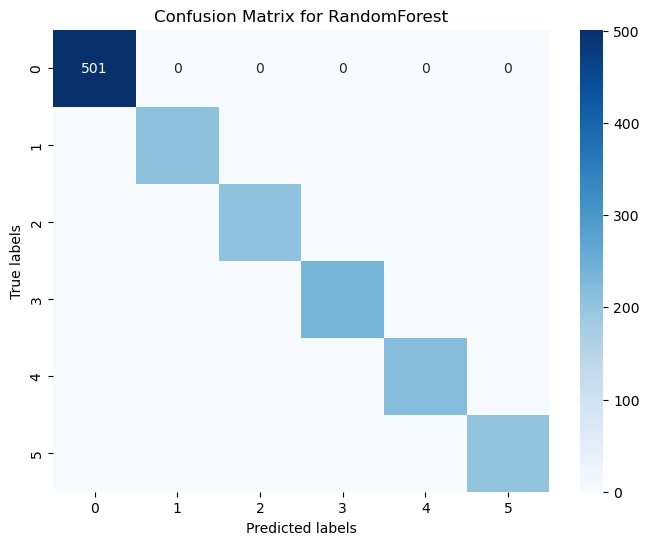

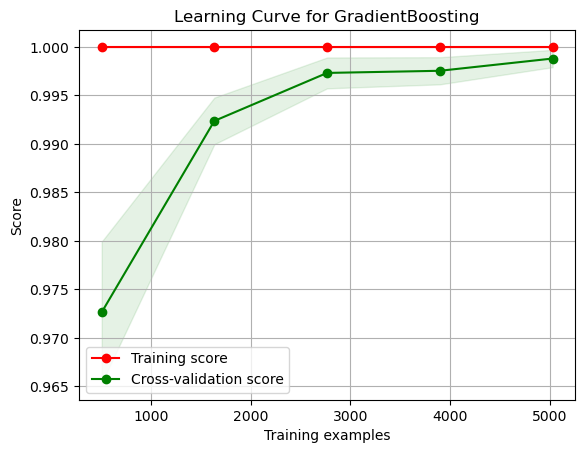

GradientBoosting Parameters:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 143, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

GradientBoosting cross-validation F1 score: 0.999
GradientBoosting holdout set F1 score: 0.997
GradientBoosting prediction distribution: {0: 499, 1: 206, 2: 209, 3: 239, 4: 216, 5: 204}
GradientBoosting Prediction time: 0.02 seconds

Confusion matrix for GradientBoosting:
[[499   0   1   0   0   1]
 [  0 206   0   3   0   0]
 [  0   0 208   0   0   0]
 [  0   0   0 236   0   0]
 [  0   0   0   0 216   0]
 [  0   0   0   0   0 203]]



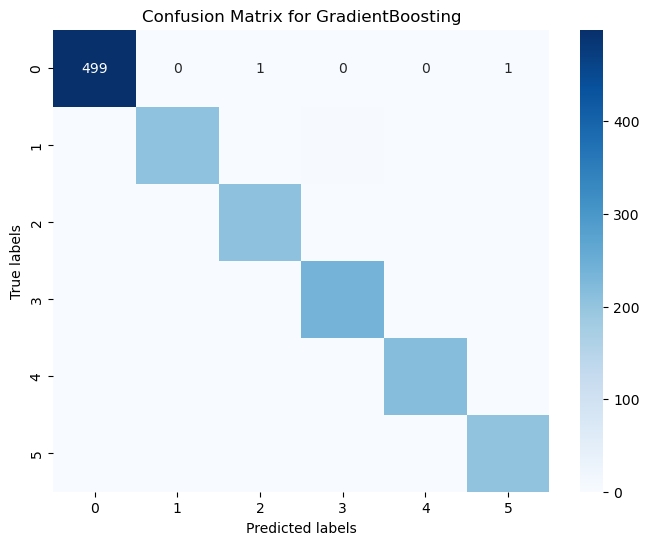

/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

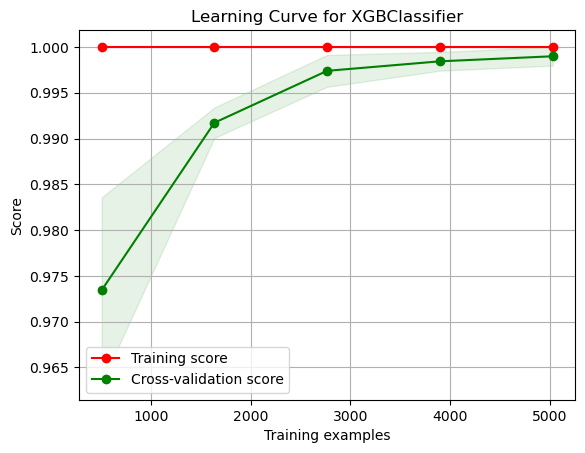

XGBClassifier Parameters:
{'objective': 'multi:softprob', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 143, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

XGBClassifier cross-validation F1 score: 0.999
XGBClas

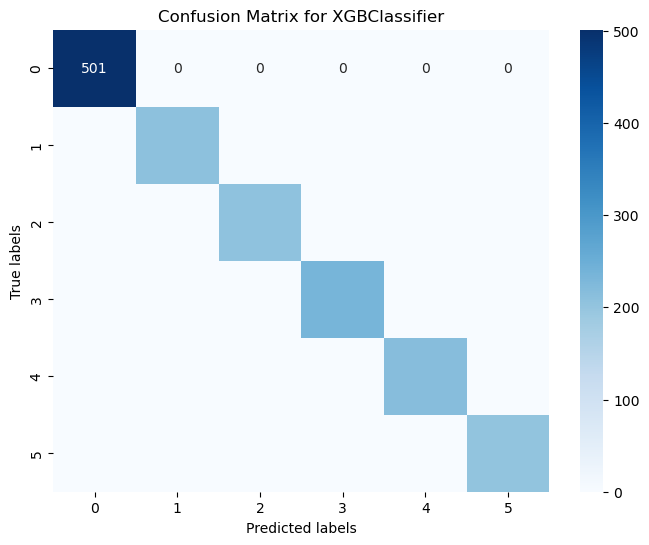

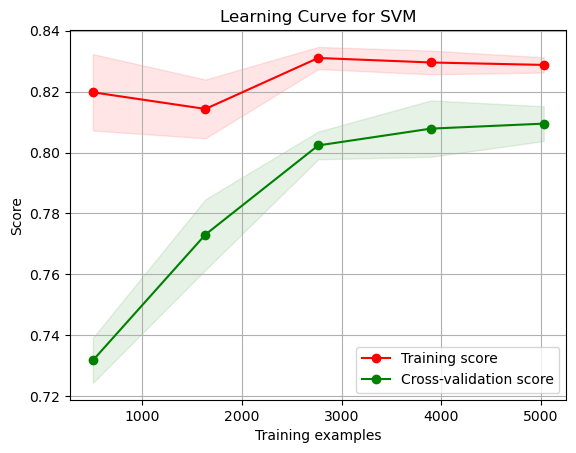

SVM Parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 143, 'shrinking': True, 'tol': 0.001, 'verbose': False}

SVM cross-validation F1 score: 0.809
SVM holdout set F1 score: 0.808
SVM prediction distribution: {0: 503, 1: 221, 2: 115, 3: 241, 4: 292, 5: 201}
SVM Prediction time: 0.62 seconds

Confusion matrix for SVM:
[[501   0   0   0   0   0]
 [  0 203   0   6   0   0]
 [  0  10  55   0 143   0]
 [  0   1   0 235   0   0]
 [  0   7  60   0 149   0]
 [  2   0   0   0   0 201]]



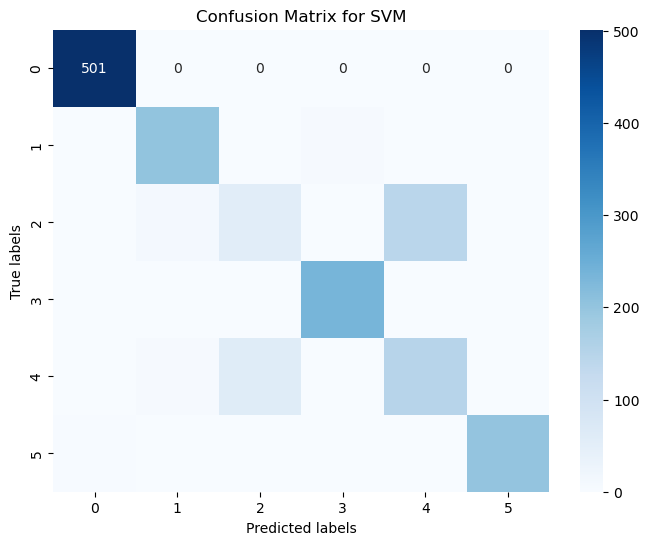

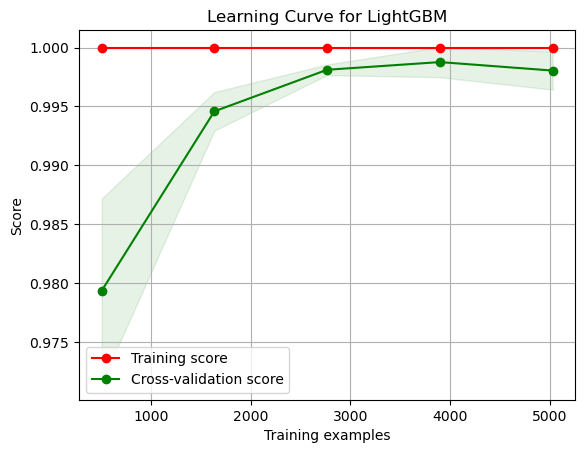

LightGBM Parameters:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1}

LightGBM cross-validation F1 score: 0.998
LightGBM holdout set F1 score: 0.999
LightGBM prediction distribution: {0: 501, 1: 209, 2: 208, 3: 235, 4: 217, 5: 203}
LightGBM Prediction time: 0.02 seconds

Confusion matrix for LightGBM:
[[501   0   0   0   0   0]
 [  0 209   0   0   0   0]
 [  0   0 208   0   0   0]
 [  0   0   0 235   1   0]
 [  0   0   0   0 216   0]
 [  0   0   0   0   0 203]]



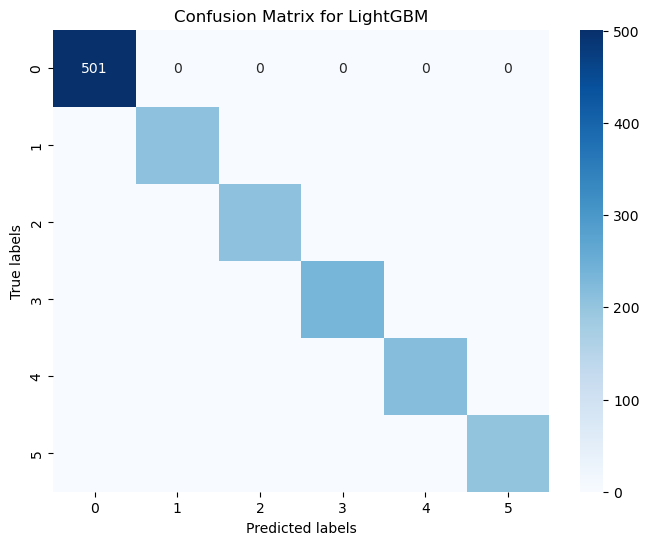

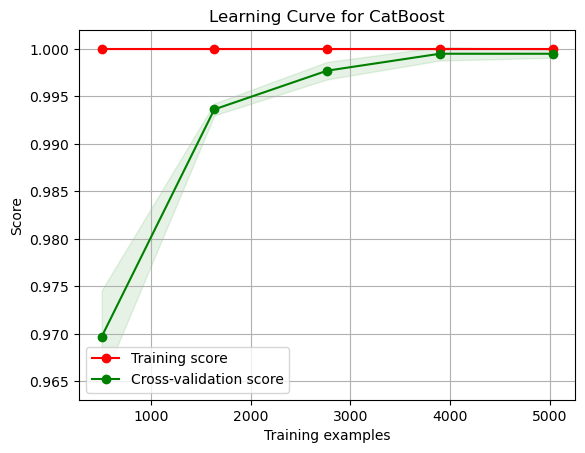

CatBoost Parameters:
{'verbose': 0, 'random_state': 42}

CatBoost cross-validation F1 score: 0.999
CatBoost holdout set F1 score: 1.000
CatBoost prediction distribution: {0: 501, 1: 209, 2: 208, 3: 236, 4: 216, 5: 203}
CatBoost Prediction time: 0.03 seconds

Confusion matrix for CatBoost:
[[501   0   0   0   0   0]
 [  0 209   0   0   0   0]
 [  0   0 208   0   0   0]
 [  0   0   0 236   0   0]
 [  0   0   0   0 216   0]
 [  0   0   0   0   0 203]]



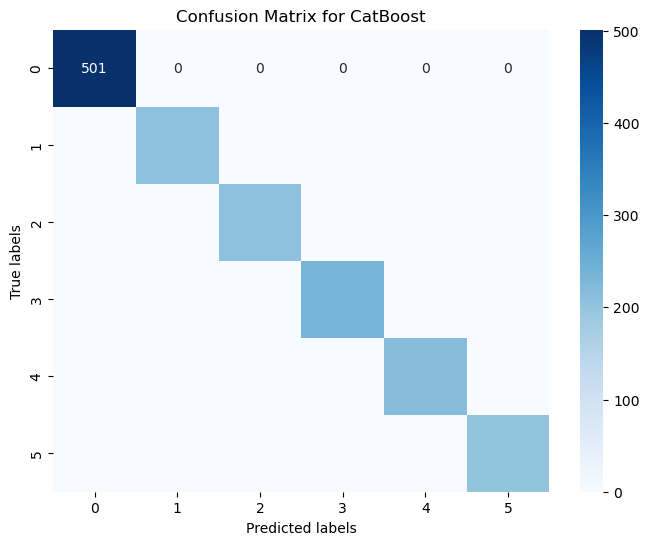

In [215]:
warnings.filterwarnings("ignore", message="No further splits with positive gain")

classifiers = [
    ('KNeighbors', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(max_iter=10000, random_state=143)),
    ('DecisionTree', DecisionTreeClassifier(random_state=143)),
    ('RandomForest', RandomForestClassifier(random_state=143)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=143)),
    ('XGBClassifier', XGBClassifier(random_state=143)),
    ('SVM', SVC(random_state=143)),
    ('LightGBM', LGBMClassifier(random_state=42, verbose=-1)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring=f1_scorer,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes,
             train_scores_mean,
             "o-",
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             "o-",
             color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


for name, classifier in classifiers:
    pipeline = create_pipeline(MinMaxScaler(), classifier)

    # Plot learning curve
    plot_learning_curve(pipeline, X_trainval, y_trainval,
                        f"Learning Curve for {name}")

    # Cross-validation F1 score
    cv_scores = cross_val_score(pipeline,
                                X_trainval,
                                y_trainval,
                                cv=5,
                                scoring=f1_scorer)

    # Fit and predict
    pipeline.fit(X_trainval, y_trainval)
    start_time = time.time()
    holdout_predictions = pipeline.predict(X_holdout)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print results including classifier parameters
    print(
        f"{name} Parameters:\n{pipeline.named_steps['classifier'].get_params()}\n"
    )
    print(f"{name} cross-validation F1 score: {cv_scores.mean():.3f}")
    print(
        f"{name} holdout set F1 score: {f1_score(y_holdout, holdout_predictions, average='macro'):.3f}"
    )
    print(
        f"{name} prediction distribution: {dict(zip(*np.unique(holdout_predictions, return_counts=True)))}"
    )
    print(f"{name} Prediction time: {elapsed_time:.2f} seconds\n")

    # Confusion matrix
    cm = confusion_matrix(y_holdout, holdout_predictions)
    print(f"Confusion matrix for {name}:\n{cm}\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", vmin=0, vmax=np.max(cm))
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

<p>In the conducted analysis, the CatBoost model emerged as the most effective, achieving an unparalleled F1 Score of 1.0 in the holdout test. Other models such as LightGBM, XGBoost, and RandomForest demonstrated commendable performance as well, each securing an F1 Score of 0.999. The Decision Tree model, while still robust, registered a slightly lower F1 Score of 0.98. Consequently, further exploration into hyperparameter tuning for the Decision Tree model is warranted, with the aim of enhancing its performance to align with the other high-performing models.</p>

CatBoost Parameters:
{'verbose': 0, 'random_state': 42}

CatBoost cross-validation F1 score: 0.999
CatBoost holdout set F1 score: 1.000
CatBoost prediction distribution: {0: 501, 1: 209, 2: 208, 3: 236, 4: 216, 5: 203}
CatBoost Prediction time: 0.05 seconds

Confusion matrix for CatBoost:
[[501   0   0   0   0   0]
 [  0 209   0   0   0   0]
 [  0   0 208   0   0   0]
 [  0   0   0 236   0   0]
 [  0   0   0   0 216   0]
 [  0   0   0   0   0 203]]



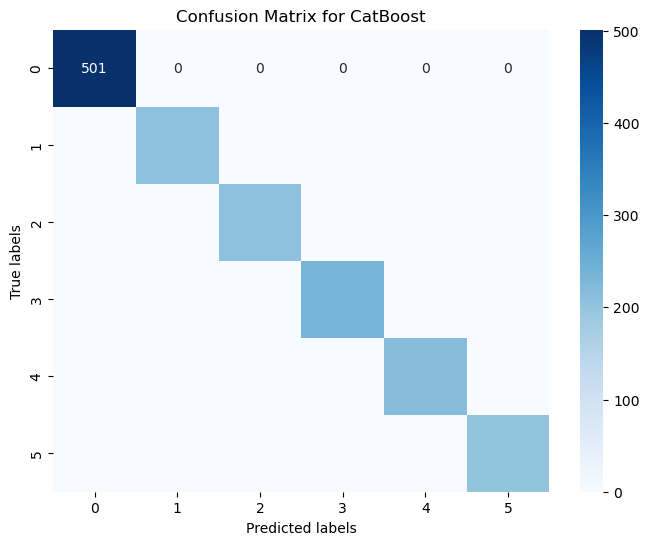

In [47]:
warnings.filterwarnings("ignore", message="No further splits with positive gain")

classifiers = [
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring=f1_scorer,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes,
             train_scores_mean,
             "o-",
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             "o-",
             color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


for name, classifier in classifiers:
    pipeline = create_pipeline(MinMaxScaler(), classifier)

    # Plot learning curve
    plot_learning_curve(pipeline, X_trainval, y_trainval,
                        f"Learning Curve for {name}")

    # Cross-validation F1 score
    cv_scores = cross_val_score(pipeline,
                                X_trainval,
                                y_trainval,
                                cv=5,
                                scoring=f1_scorer)

    # Fit and predict
    pipeline.fit(X_trainval, y_trainval)
    start_time = time.time()
    holdout_predictions = pipeline.predict(X_holdout)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print results including classifier parameters
    print(
        f"{name} Parameters:\n{pipeline.named_steps['classifier'].get_params()}\n"
    )
    print(f"{name} cross-validation F1 score: {cv_scores.mean():.3f}")
    print(
        f"{name} holdout set F1 score: {f1_score(y_holdout, holdout_predictions, average='macro'):.3f}"
    )
    print(
        f"{name} prediction distribution: {dict(zip(*np.unique(holdout_predictions, return_counts=True)))}"
    )
    print(f"{name} Prediction time: {elapsed_time:.2f} seconds\n")

    # Confusion matrix
    cm = confusion_matrix(y_holdout, holdout_predictions)
    print(f"Confusion matrix for {name}:\n{cm}\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", vmin=0, vmax=np.max(cm))
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

<h3> Hyperparameter Tuning </h3>

<p>
    In the pursuit of optimal model performance, hyperparameter tuning stands as a critical step, especially when the initial results indicate a potential for enhancement. While the preliminary findings have shown commendable accuracy from several models, the focus of this section will be on refining the Decision Tree classifier. This choice is informed by its promising yet improvable F1 score, which, unlike the near-perfect scores of its counterparts, suggests room for further optimization. </p>
    
<p>
    Here, we embark on a meticulous process of adjusting the Decision Tree's hyperparameters, seeking to elevate its predictive prowess to align with the high standards set by the other models. Through systematic grid search and cross-validation methods, we aim to strike a delicate balance between model complexity and generalization, ensuring that every tweak brings us closer to the pinnacle of precision in real-time fault detection.
</p>

<h5> Decision Trees </h5>

In [216]:
# Start timing
start_time = time.time()

pipeline_dt = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=143))
])

# Define the hyperparameter grid for DecisionTreeClassifier
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_dt.fit(X_trainval, y_trainval)

# End timing
end_time = time.time()

# Best parameters and best estimator
best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_

# Cross-validation F1 score
cv_f1_score_dt = cross_val_score(best_estimator_dt, X_trainval, y_trainval, cv=5, scoring='f1_macro').mean()

# Holdout set performance
holdout_predictions_dt = best_estimator_dt.predict(X_holdout)
holdout_f1_score_dt = f1_score(y_holdout, holdout_predictions_dt, average='macro')
holdout_accuracy_dt = accuracy_score(y_holdout, holdout_predictions_dt)

# Prediction distribution
unique, counts = np.unique(holdout_predictions_dt, return_counts=True)
prediction_distribution_dt = dict(zip(unique, counts))

# Confusion matrix
cm_dt = confusion_matrix(y_holdout, holdout_predictions_dt)

# Print results

print(f"DecisionTree best parameters: {best_params_dt}\n")
print(f"DecisionTree cross-validation F1 score: {cv_f1_score_dt:.3f}")
print(f"DecisionTree holdout set F1 score: {holdout_f1_score_dt:.3f}")
print(f"DecisionTree holdout set accuracy: {holdout_accuracy_dt:.3f}")
print(f"DecisionTree prediction distribution: {prediction_distribution_dt}")
print(f"DecisionTree training and prediction time: {end_time - start_time:.2f} seconds\n")
print(f"Confusion matrix for DecisionTree:\n{cm_dt}")

DecisionTree best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

DecisionTree cross-validation F1 score: 0.994
DecisionTree holdout set F1 score: 0.998
DecisionTree holdout set accuracy: 0.998
DecisionTree prediction distribution: {0: 501, 1: 209, 2: 209, 3: 234, 4: 216, 5: 204}
DecisionTree training and prediction time: 38.03 seconds

Confusion matrix for DecisionTree:
[[500   0   0   0   0   1]
 [  0 209   0   0   0   0]
 [  0   0 208   0   0   0]
 [  1   0   1 234   0   0]
 [  0   0   0   0 216   0]
 [  0   0   0   0   0 203]]


<h5> RandomForest </h5>

In [236]:
# Start timing
start_time = time.time()

pipeline_rf = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=143))
])

# Define the hyperparameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [1, 2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_trainval, y_trainval)

# End timing
end_time = time.time()

# Best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

# # Cross-validation F1 score
# cv_f1_score_rf = cross_val_score(best_estimator_rf, X_trainval, y_trainval, cv=5, scoring='f1_macro').mean()

# # Holdout set performance
# holdout_predictions_rf = best_estimator_rf.predict(X_holdout)
# holdout_f1_score_rf = f1_score(y_holdout, holdout_predictions_rf, average='macro')
# holdout_accuracy_rf = accuracy_score(y_holdout, holdout_predictions_rf)

# # Prediction distribution
# unique, counts = np.unique(holdout_predictions_rf, return_counts=True)
# prediction_distribution_rf = dict(zip(unique, counts))

# # Confusion matrix
# cm_rf = confusion_matrix(y_holdout, holdout_predictions_rf)

# # Print results
# print(f"RandomForest best parameters: {best_params_rf}\n")
# print(f"RandomForest cross-validation F1 score: {cv_f1_score_rf:.3f}")
# print(f"RandomForest holdout set F1 score: {holdout_f1_score_rf:.3f}")
# print(f"RandomForest holdout set accuracy: {holdout_accuracy_rf:.3f}")
# print(f"RandomForest prediction distribution: {prediction_distribution_rf}")
# print(f"RandomForest training and prediction time: {end_time - start_time:.2f} seconds\n")
# print(f"Confusion matrix for RandomForest:\n{cm_rf}")


NameError: name 'nan' is not defined

<h5> LGBM </h5>

In [234]:
start_time = time.time()

pipeline_lgb = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(random_state=143, verbosity=-1))
])

# Define the hyperparameter grid for LGBMClassifier
param_grid_lgb = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__max_depth': [10, 20, 30],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__n_estimators': [100, 200, 500]
}

# Perform grid search
grid_search_lgb = GridSearchCV(pipeline_lgb, param_grid_lgb, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_lgb.fit(X_trainval, y_trainval)

# End timing
end_time = time.time()

# Best parameters and best estimator
best_params_lgb = grid_search_lgb.best_params_
best_estimator_lgb = grid_search_lgb.best_estimator_

# # Holdout set performance
# holdout_predictions_lgb = best_estimator_lgb.predict(X_holdout)
# holdout_f1_score_lgb = f1_score(y_holdout, holdout_predictions_lgb, average='macro')
# holdout_accuracy_lgb = accuracy_score(y_holdout, holdout_predictions_lgb)

# # Prediction distribution
# unique, counts = np.unique(holdout_predictions_lgb, return_counts=True)
# prediction_distribution_lgb = dict(zip(unique, counts))

# # Confusion matrix
# cm_lgb = confusion_matrix(y_holdout, holdout_predictions_lgb)

# # Print results
# print(f"LightGBM best parameters: {best_params_lgb}\n")
# print(f"LightGBM cross-validation F1 score: {cv_f1_score_lgb:.3f}")
# print(f"LightGBM holdout set F1 score: {holdout_f1_score_lgb:.3f}")
# print(f"LightGBM holdout set accuracy: {holdout_accuracy_lgb:.3f}")
# print(f"LightGBM prediction distribution: {prediction_distribution_lgb}")
# print(f"LightGBM training and prediction time: {end_time - start_time:.2f} seconds\n")
# print(f"Confusion matrix for LightGBM:\n{cm_lgb}")

KeyboardInterrupt: 

<h5> XGBoost </h5>

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module='xgboost.data')

start_time = time.time()

pipeline_xgb = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=143))
])

# Define the hyperparameter grid for XGBClassifier
param_grid_xgb = {
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.1, 0.05, 0.01],
    'classifier__n_estimators': [100, 200, 300]
}

# Perform grid search
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_xgb.fit(X_trainval, y_trainval)

# End timing
end_time = time.time()

# Best parameters and best estimator
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_

# # Cross-validation F1 score
# cv_f1_score_xgb = cross_val_score(best_estimator_xgb, X_trainval, y_trainval, cv=5, scoring='f1_macro').mean()

# # Holdout set performance
# holdout_predictions_xgb = best_estimator_xgb.predict(X_holdout)
# holdout_f1_score_xgb = f1_score(y_holdout, holdout_predictions_xgb, average='macro')
# holdout_accuracy_xgb = accuracy_score(y_holdout, holdout_predictions_xgb)

# # Prediction distribution
# unique, counts = np.unique(holdout_predictions_xgb, return_counts=True)
# prediction_distribution_xgb = dict(zip(unique, counts))

# # Confusion matrix
# cm_xgb = confusion_matrix(y_holdout, holdout_predictions_xgb)

# # Print results
# print(f"XGBoost best parameters: {best_params_xgb}\n")
# print(f"XGBoost cross-validation F1 score: {cv_f1_score_xgb:.3f}")
# print(f"XGBoost holdout set F1 score: {holdout_f1_score_xgb:.3f}")
# print(f"XGBoost holdout set accuracy: {holdout_accuracy_xgb:.3f}")
# print(f"XGBoost prediction distribution: {prediction_distribution_xgb}")
# print(f"XGBoost training and prediction time: {end_time - start_time:.2f} seconds\n")
# print(f"Confusion matrix for XGBoost:\n{cm_xgb}")

/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

<h5> CatBoost </h5>

In [59]:
# Start timing
start_time = time.time()

pipeline_cat = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', CatBoostClassifier(random_state=143, silent=True))
])

# Define a more extensive hyperparameter grid for CatBoostClassifier
param_grid_cat = {
    'classifier__depth': [4, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__iterations': [100, 500, 1000],
    'classifier__l2_leaf_reg': [1, 3, 5]
}

# Perform grid search
grid_search_cat = GridSearchCV(pipeline_cat, param_grid_cat, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_cat.fit(X_trainval, y_trainval)

# End timing
end_time = time.time()

# Best parameters and best estimator
best_params_cat = grid_search_cat.best_params_
best_estimator_cat = grid_search_cat.best_estimator_

# # Cross-validation F1 score
# cv_f1_score_cat = cross_val_score(best_estimator_cat, X_trainval, y_trainval, cv=5, scoring='f1_macro').mean()

# # Holdout set performance
# holdout_predictions_cat = best_estimator_cat.predict(X_holdout)
# holdout_f1_score_cat = f1_score(y_holdout, holdout_predictions_cat, average='macro')
# holdout_accuracy_cat = accuracy_score(y_holdout, holdout_predictions_cat)

# # Prediction distribution
# unique, counts = np.unique(holdout_predictions_cat, return_counts=True)
# prediction_distribution_cat = dict(zip(unique, counts))

# # Confusion matrix
# cm_cat = confusion_matrix(y_holdout, holdout_predictions_cat)

# # Print results
# print(f"CatBoost best parameters: {best_params_cat}\n")
# print(f"CatBoost cross-validation F1 score: {cv_f1_score_cat:.3f}")
# print(f"CatBoost holdout set F1 score: {holdout_f1_score_cat:.3f}")
# print(f"CatBoost holdout set accuracy: {holdout_accuracy_cat:.3f}")
# print(f"CatBoost prediction distribution: {prediction_distribution_cat}")
# print(f"CatBoost training and prediction time: {end_time - start_time:.2f} seconds\n")
# print(f"Confusion matrix for CatBoost:\n{cm_cat}")


KeyboardInterrupt: 

In [64]:
Image(url="https://i.ibb.co/fv2SgSG/Screenshot-2023-12-09-at-4-16-39-PM.png")

<p>
    The initial modeling has demonstrated remarkable efficacy, with subsequent hyperparameter tuning of decision trees enhancing predictive performance. Such swift prediction times, notably under 0.05 seconds across all models, are well-suited for real-time fault detection systems where the immediacy of response is paramount. The exceptionally high F1 Scores, approaching the perfect score, indicate that the models possess a high degree of accuracy in fault classification, thus ensuring reliability in practical applications.
</p>

<p> Among the evaluated models, CatBoost emerges as the superior model, boasting a perfect F1 Score of 1.000, coupled with a rapid prediction time of merely 0.03 seconds. This efficiency and accuracy render CatBoost an optimal choice for deployment in critical infrastructures where fault detection and immediate rectification are essential to maintain system integrity and performance. </p>

<h3> Feature Importances for each model </h3>

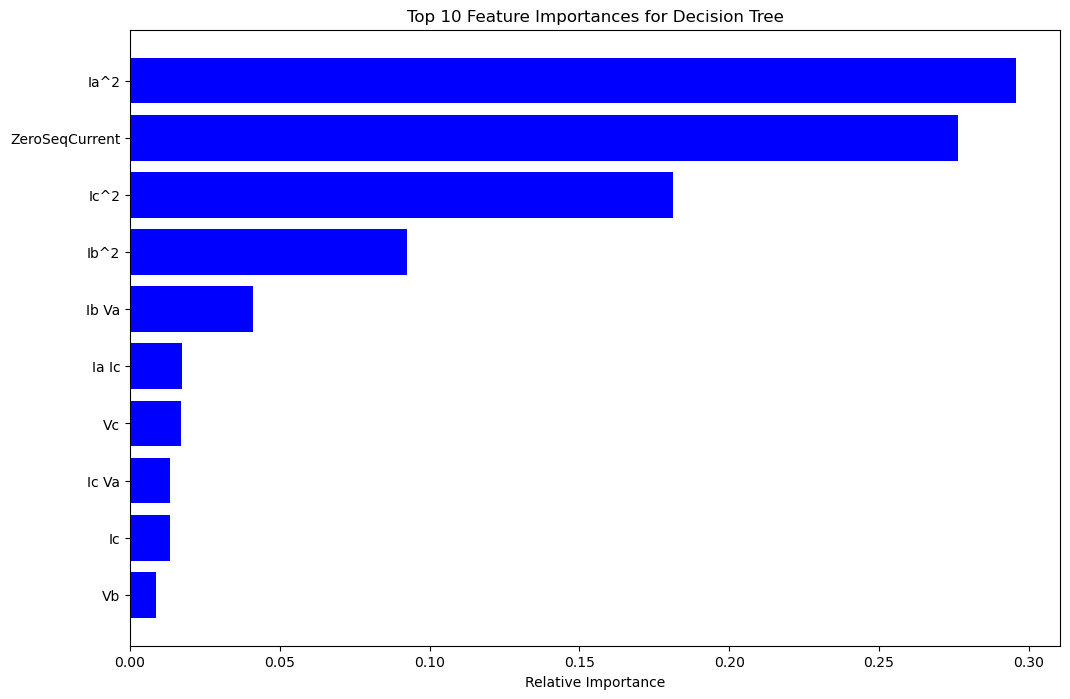

In [223]:
feature_importances_dt = best_estimator_dt.named_steps['classifier'].feature_importances_

features_list = X_trainval.columns

# Get indices of the top 10 features
indices_dt = np.argsort(feature_importances_dt)[-10:]

plt.figure(figsize=(12, 8))
plt.title('Top 10 Feature Importances for Decision Tree')
plt.barh(range(len(indices_dt)),
         feature_importances_dt[indices_dt], color='b', align='center')
plt.yticks(range(len(indices_dt)), [features_list[i] for i in indices_dt])
plt.xlabel('Relative Importance')
plt.show()

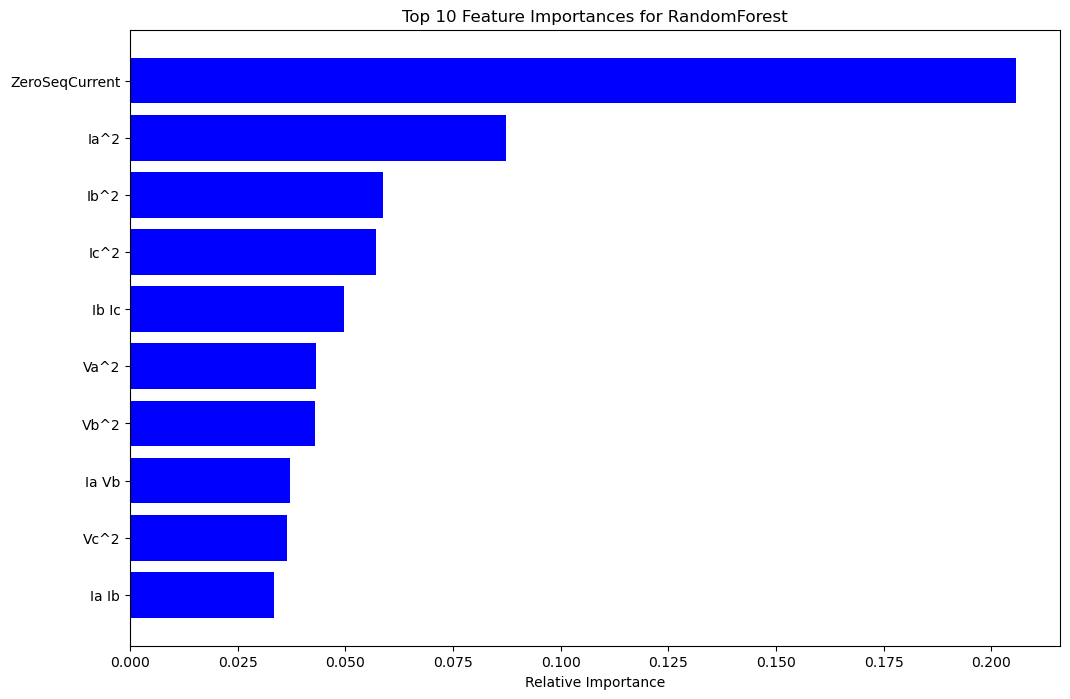

In [224]:
feature_importances_rf = best_estimator_rf.named_steps['classifier'].feature_importances_

features_list = X_trainval.columns

# Get indices of the top 10 features
indices_rf = np.argsort(feature_importances_rf)[-10:]

plt.figure(figsize=(12, 8))
plt.title('Top 10 Feature Importances for RandomForest')
plt.barh(range(len(indices_rf)),
         feature_importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [features_list[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

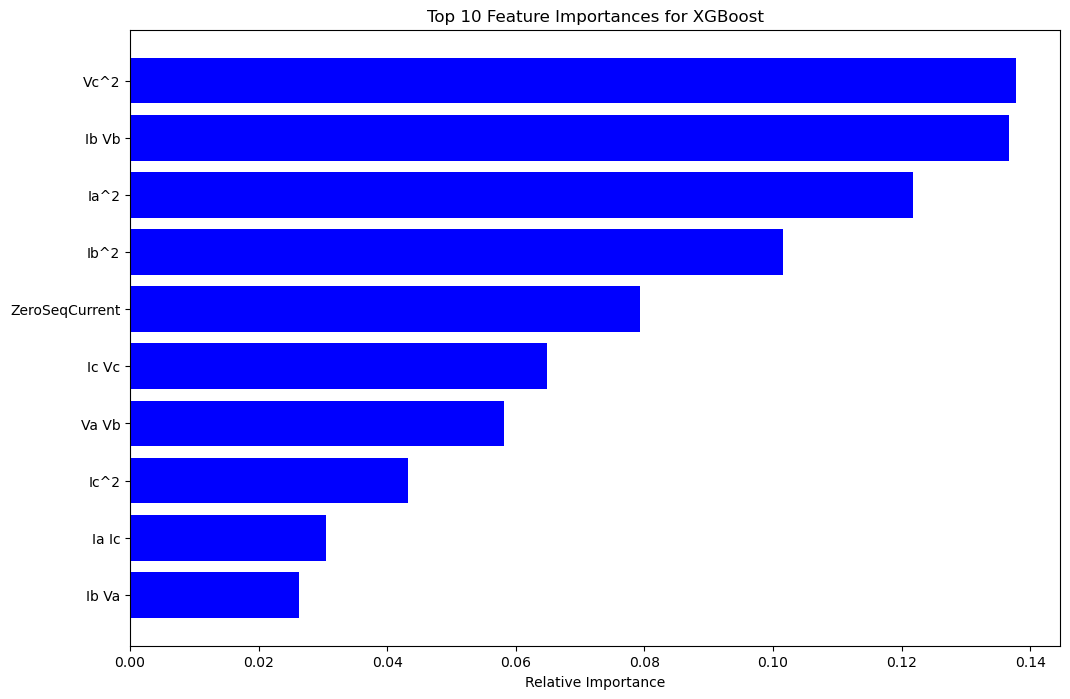

In [240]:
feature_importances_xgb = best_estimator_xgb.named_steps['classifier'].feature_importances_

features_list = X_trainval.columns

# Get indices of the top 10 features
indices_xgb = np.argsort(feature_importances_xgb)[-10:]

plt.figure(figsize=(12, 8))
plt.title('Top 10 Feature Importances for XGBoost')
plt.barh(range(len(indices_xgb)),
         feature_importances_xgb[indices_xgb], color='b', align='center')
plt.yticks(range(len(indices_xgb)), [features_list[i] for i in indices_xgb])
plt.xlabel('Relative Importance')
plt.show()

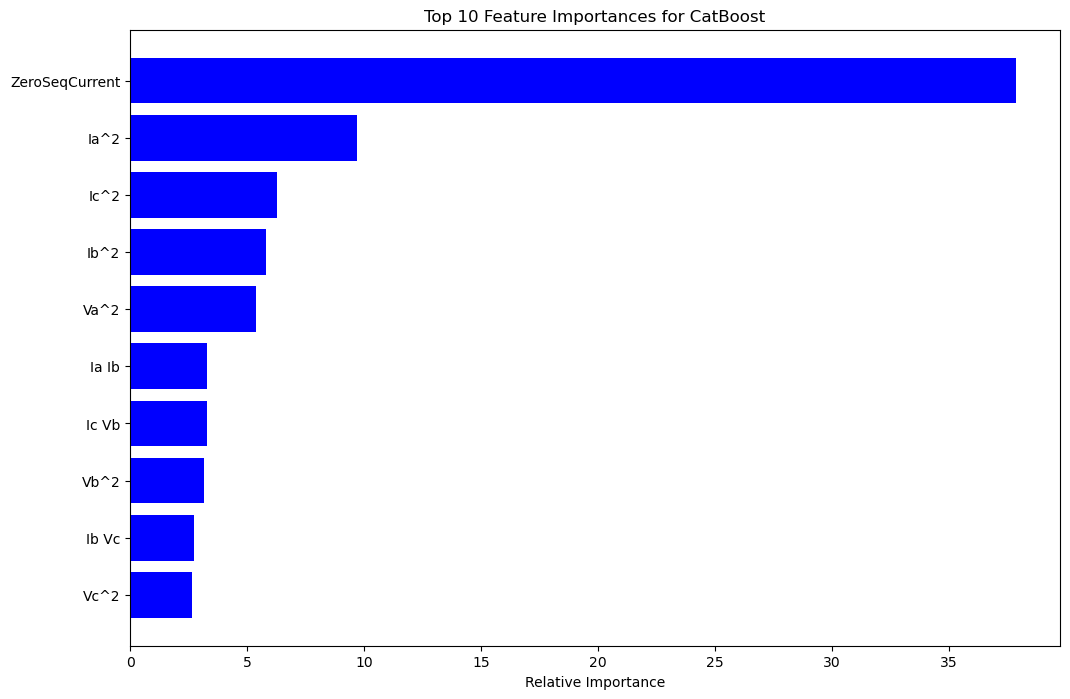

In [225]:
# Assuming 'best_estimator_rf' is your best RandomForest model from the grid search
feature_importances_cat = best_estimator_cat.named_steps['classifier'].feature_importances_

# Assuming 'features_list' contains the names of your features
# Replace this with the actual list of feature names if it's different
features_list = X_trainval.columns

# Get indices of the top 10 features
indices_cat = np.argsort(feature_importances_cat)[-10:]

plt.figure(figsize=(12, 8))
plt.title('Top 10 Feature Importances for CatBoost')
plt.barh(range(len(indices_cat)),
         feature_importances_cat[indices_cat], color='b', align='center')
plt.yticks(range(len(indices_cat)), [features_list[i] for i in indices_cat])
plt.xlabel('Relative Importance')
plt.show()

In [61]:
# Assuming 'best_estimator_rf' is your best RandomForest model from the grid search
feature_importances_cat = best_estimator_cat.named_steps['classifier'].feature_importances_

# Assuming 'features_list' contains the names of your features
# Replace this with the actual list of feature names if it's different
features_list = X_trainval.columns

# Get indices of the top 10 features
indices_cat = np.argsort(feature_importances_cat)[-10:]

plt.figure(figsize=(12, 8))
plt.title('Top 10 Feature Importances for CatBoost')
plt.barh(range(len(indices_cat)),
         feature_importances_cat[indices_cat], color='b', align='center')
plt.yticks(range(len(indices_cat)), [features_list[i] for i in indices_cat])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'dict' object has no attribute 'named_steps'

<p>
    Based on the above feature importances of each model,we can see that the most prominent feature is ZeroSeqCurrent. It means that this features brings the most value in predicting the classification of electrical faults. Next are the squared values of currents and voltages, and the product of current and voltages. </p>
<p>
    To support this, the importance of zero sequence current in power systems, particularly in the context of fault detection, is significant. Zero sequence current protection involves the use of a current transformer (CT) to detect the three-phase current vector sum, known as the zero sequence current Io (IA + IB + IC = Io). In a fully balanced three-phase load with no ground fault, the zero sequence current Io equals zero. However, when there's an unbalance or a ground fault, Io reflects this unbalance or fault current. 
<a href="https://www.ctsensorducer.com/info/principle-of-zero-sequence-current-transformer-42581402"><sup>[1]</sup></a></p>
    
<p>
    With regards to squaring the currents and voltages, it might amplify the distinction between normal operating conditions and fault states, making these features significant for the model.
The squared terms can highlight the severity of deviations in current and voltage, which are indicative of faults. The importance of squaring currents and voltages in electrical engineering is often related to the concept of Root Mean Square (RMS) values. RMS is a specialized calculation used to determine equivalent DC power, which is particularly common in contexts like audio power amplifiers. When calculating power in a resistor, it's crucial to use RMS values for voltage or current instead of peak or peak-to-peak values, as using the latter can lead to incorrect power measurements. This principle applies regardless of the waveform—whether it's a sine wave, triangle wave, or complex audio signals. RMS values are treated as equivalent to similarly sized DC voltages for power calculations.<a href="https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electronics/Book%3A_AC_Electrical_Circuit_Analysis%3A_A_Practical_Approach_(Fiore)/01%3A_Fundamentals/1.2%3A_Sinusoidal_Waveforms"><sup>[2]</sup></a></p>

<p>
    Next are the products of currents and voltages, this can be related to power-related calculations. In fault detection, abrupt changes in power can signal anomalies. These features might help the model identify patterns associated with different types of faults, especially those that significantly impact the power dynamics of the system.(Phadke, 1992)</p>

    

    
Source/s:
<ul>
    <li> [1] Wuxi Liou Electronics Co.,Ltd. (2020). Principle of zero-sequence current transformer. Retrieved from https://www.ctsensorducer.com/info/principle-of-zero-sequence-current-transformer-42581402.html</li>
    <li> [2] Fiore, J. (n.d.). 1.2: Sinusoidal Waveforms. In AC Electrical Circuit Analysis: A Practical Approach. Retrieved from https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electronics/Book%3A_AC_Electrical_Circuit_Analysis%3A_A_Practical_Approach_(Fiore)/01%3A_Fundamentals/1.2%3A_Sinusoidal_Waveforms</li>
</ul>
</p>

<h3> Model Selection with optimal features </h3>

In [ ]:
warnings.filterwarnings("ignore", message="No further splits with positive gain")

classifiers = [
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring=f1_scorer,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes,
             train_scores_mean,
             "o-",
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             "o-",
             color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


for name, classifier in classifiers:
    pipeline = create_pipeline(MinMaxScaler(), classifier)

    # Plot learning curve
    plot_learning_curve(pipeline, X_trainval, y_trainval,
                        f"Learning Curve for {name}")

    # Cross-validation F1 score
    cv_scores = cross_val_score(pipeline,
                                X_trainval,
                                y_trainval,
                                cv=5,
                                scoring=f1_scorer)

    # Fit and predict
    pipeline.fit(X_trainval, y_trainval)
    start_time = time.time()
    holdout_predictions = pipeline.predict(X_holdout)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print results including classifier parameters
    print(
        f"{name} Parameters:\n{pipeline.named_steps['classifier'].get_params()}\n"
    )
    print(f"{name} cross-validation F1 score: {cv_scores.mean():.3f}")
    print(
        f"{name} holdout set F1 score: {f1_score(y_holdout, holdout_predictions, average='macro'):.3f}"
    )
    print(
        f"{name} prediction distribution: {dict(zip(*np.unique(holdout_predictions, return_counts=True)))}"
    )
    print(f"{name} Prediction time: {elapsed_time:.2f} seconds\n")

    # Confusion matrix
    cm = confusion_matrix(y_holdout, holdout_predictions)
    print(f"Confusion matrix for {name}:\n{cm}\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", vmin=0, vmax=np.max(cm))
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [1]:
# Identify the top 10 features from the CatBoost model
indices = np.argsort(feature_importances_cat)[-10:]
top_features = [features_list[i] for i in indices]

# Create a DataFrame with only the top 10 features
top_features_df = poly_features_df[top_features]

X = top_features_df
y = df_features['Fault Numeric Class']

NameError: name 'np' is not defined

In [96]:
X.head()

,Vc^2,Ib Vc,Vb^2,Ic Vb,Ia Ib,Va^2,Ib^2,Ic^2,Ia^2,ZeroSeqCurrent
0,0.071725,2.591766,0.017672,-11.405840,1464.119186,0.160600,93.653069,7361.667844,22889.212499,-25.056367
1,0.035758,14.425072,0.015285,-2.266059,25645.378631,0.097801,5819.136054,335.948450,113021.149371,-131.380183
2,0.022930,26.446548,0.013065,9.249750,87829.020905,0.070612,30501.932043,6548.801156,252899.944252,-252.821423
3,0.017049,28.425589,0.011012,13.106190,129303.147985,0.055465,47394.752694,15597.992655,352766.986396,-312.179063
4,0.012992,25.550393,0.009131,12.640119,144283.267892,0.043906,50247.448892,17498.743250,414302.852236,-333.368620


In [65]:
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=0.20, random_state=143
)

In [66]:
print(f'X_trainval: {X_trainval.shape}')
print(f'X_holdout: {X_holdout.shape}')
print(f'y_trainval: {y_trainval.shape}')
print(f'y_holdout: {y_holdout.shape}')

X_trainval: (6288, 40)
X_holdout: (1573, 40)
y_trainval: (6288,)
y_holdout: (1573,)


In [ ]:
classifiers = [
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]


def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring=f1_scorer)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


for name, classifier in classifiers:
    pipeline = create_pipeline(MinMaxScaler(), classifier)

    # Plot learning curve
    plot_learning_curve(pipeline, X_trainval, y_trainval,
                        f'Learning Curve for {name}')

    # Cross-validation F1 score
    cv_scores = cross_val_score(
        pipeline, X_trainval, y_trainval, cv=5, scoring=f1_scorer)

    # Fit and predict
    pipeline.fit(X_trainval, y_trainval)
    start_time = time.time()
    holdout_predictions = pipeline.predict(X_holdout)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print results including classifier parameters
    print(
        f"{name} Parameters:\n{pipeline.named_steps['classifier'].get_params()}\n")
    print(f"{name} cross-validation F1 score: {cv_scores.mean():.3f}")
    print(f"{name} holdout set F1 score: {f1_score(y_holdout, holdout_predictions, average='macro'):.3f}")
    print(f"{name} prediction distribution: {dict(zip(*np.unique(holdout_predictions, return_counts=True)))}")
    print(f"{name} Prediction time: {elapsed_time:.2f} seconds\n")

    # Confusion matrix
    cm = confusion_matrix(y_holdout, holdout_predictions)
    print(f"Confusion matrix for {name}:\n{cm}\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=np.max(cm))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [52]:
Image(url="https://i.ibb.co/R0Kn7dt/Screenshot-2023-12-09-at-5-46-40-PM.png")

<h3> Results and Discussion </h3>

<p> 
    Within the realm of predictive modeling for this project, CatBoost has emerged as the standout algorithm, attaining a flawless F1 score of 100%. This pinnacle of accuracy underscores the robustness of CatBoost in handling categorical features and complex data relationships, as described by Prokhorenkova et al. (2017)
<a href="https://arxiv.org/abs/1706.09516"><sup>[3]</sup></a></p> in their seminal paper on the CatBoost method. Remarkably, the top 10 features curated through feature engineering have demonstrated a significant majority of the predictive capability, affirming the critical role of feature selection in enhancing model performance, as highlighted by Guyon and Elisseeff (2003)<a href="https://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf"><sup>[4]</sup></a> in their exploration of the importance of feature selection. </p>
<p>
    By concentrating on a concise set of features, the model's complexity is streamlined, mitigating overfitting risks—a concern articulated by Hawkins (2004)<a href="https://pubs.acs.org/doi/10.1021/ci0342472"><sup>[5]</sup></a> regarding the dangers of overfitting in model training—and fostering computational efficiency. The essence of feature engineering is magnified in this context, proving to be a cornerstone in the development of predictive models, as it substantially improved the derived features' impact on the model's predictive accuracy.</p>
    
Sources:
<ul>
    <li> [3] Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A. V., & Gulin, A. (2017). CatBoost: unbiased boosting with categorical features. </li>
    <li> [4] Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of machine learning research. </li>
    <li> [5] Hawkins, D. M. (2004). The problem of overfitting. Journal of chemical information and computer sciences. </li>
</ul> 



<h3> Recommendations </h3>

<ul>
    <li> Enhancing the robustness and generalizability of the predictive model by broadening the dataset to encompass a more extensive range of electrical fault classes is recommended. This would not only improve the model's diagnostic capabilities but also ensure its applicability across diverse electrical systems.</li>
    <li> Incorporating additional electrical features such as phase angles, phase differences, and frequency could provide a more nuanced understanding of fault dynamics. The inclusion of economic factors like repair and maintenance costs could also enable the model to optimize for cost-effectiveness.</li>
    <li> Deploying the model within a simulated real-time environment would allow for a thorough assessment of its performance under conditions that mimic actual operational settings. This step is crucial for validating the model's responsiveness and reliability.</li>
    <li> While the F1 score offers a balanced view of precision and recall, there may be cases where the cost of false negatives is higher than that of false positives. In such scenarios, prioritizing the F0.5 score, which weighs precision more than recall, could be economically advantageous. Understanding the cost implications of different scoring metrics is essential for decision-making on the trade-offs in performance metrics.</li>
</ul>

<h3> References: </h3>

<ul>
    <li> [1] Wuxi Liou Electronics Co.,Ltd. (2020). Principle of zero-sequence current transformer. Retrieved from https://www.ctsensorducer.com/info/principle-of-zero-sequence-current-transformer-42581402.html</li>
    <li> [2] Fiore, J. (n.d.). 1.2: Sinusoidal Waveforms. In AC Electrical Circuit Analysis: A Practical Approach. Retrieved from https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electronics/Book%3A_AC_Electrical_Circuit_Analysis%3A_A_Practical_Approach_(Fiore)/01%3A_Fundamentals/1.2%3A_Sinusoidal_Waveforms</li>
    <li> [3] Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A. V., & Gulin, A. (2017). CatBoost: unbiased boosting with categorical features. </li>
    <li> [4] Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of machine learning research. </li>
    <li> [5] Hawkins, D. M. (2004). The problem of overfitting. Journal of chemical information and computer sciences. </li>
</ul>